In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
import function as func
from ellipsoid_mirror import *
np.set_printoptions(threshold=20)

plt.rcParams['font.size'] = 18
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

# General setting

In [5]:
freq = 5*GHz 
wavelength = calc_wavelength(freq)

# Setup calculation

## Horn antenna

In [6]:
antenna_a = 20*mm # waveguide long edge
antenna_b = 40*mm # waveguide short edge (E-field direction)
antenna_L = 120*mm # antenna length
antenna_taper = np.deg2rad(14) # antenna taper angle

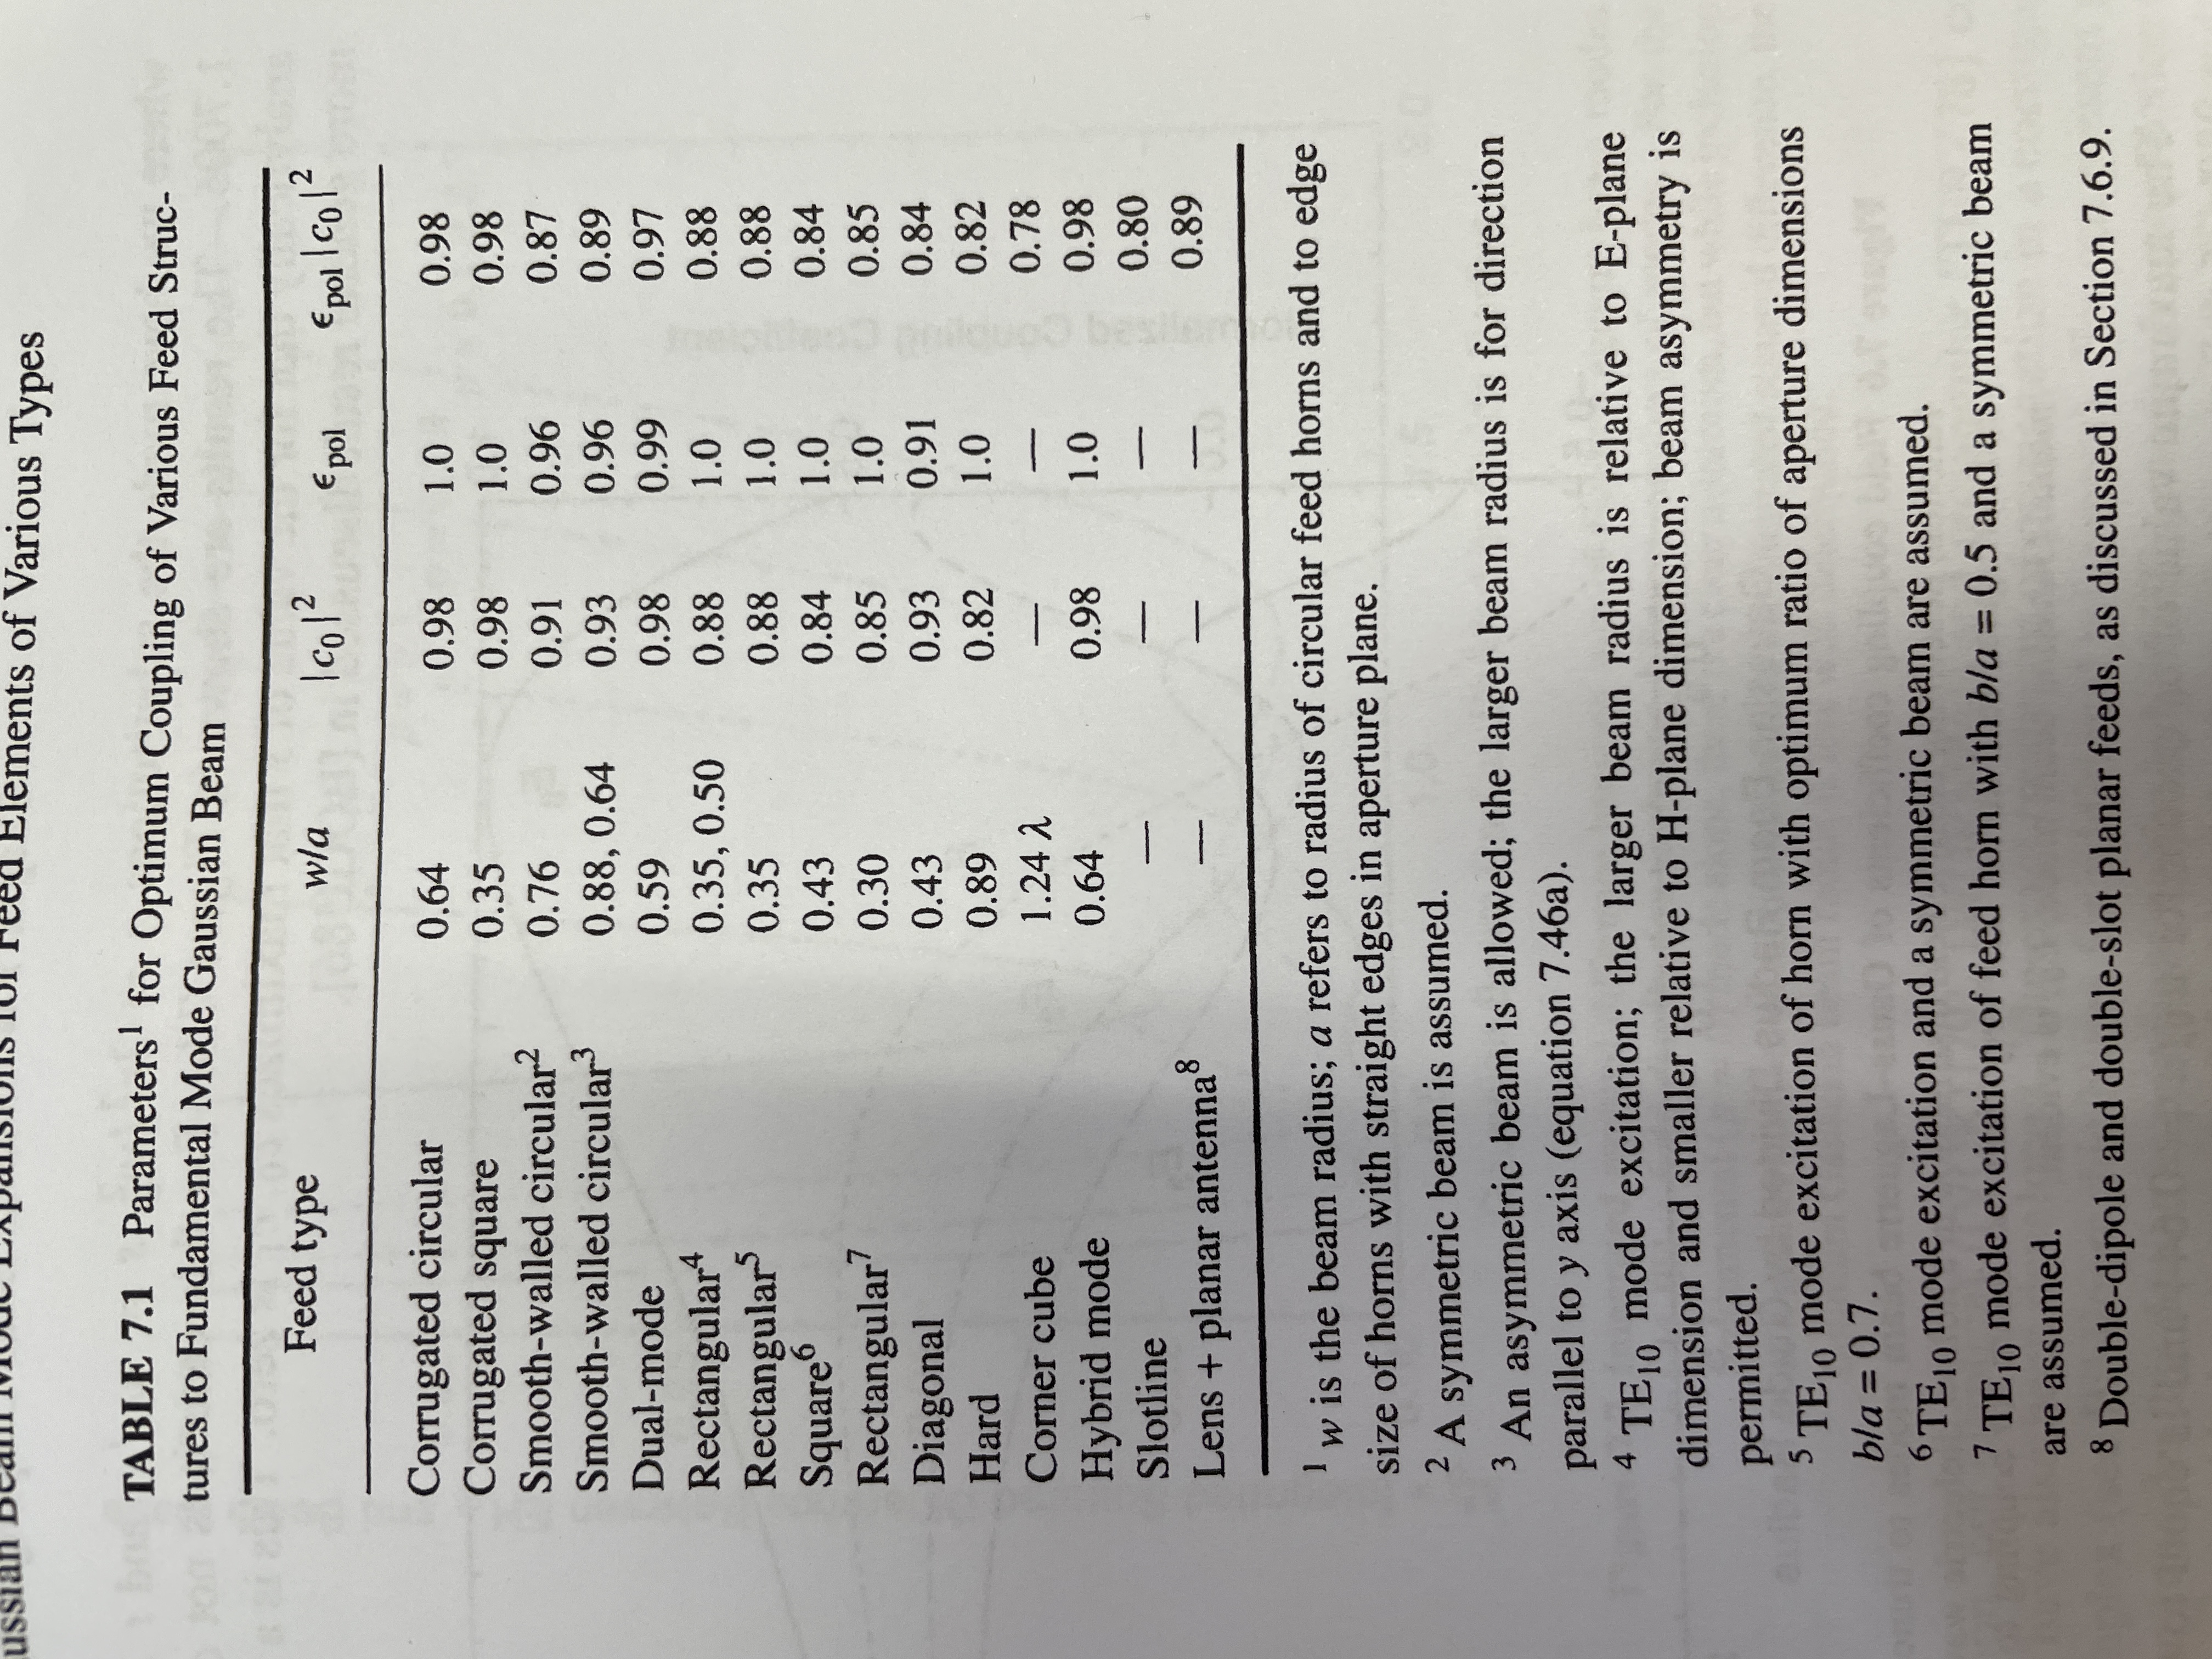

In [7]:
from IPython.display import Image
Image('Goldsmith_table7.1.JPG', width=400)

In [8]:
def calc_antenna_parameters(
    antenna_a=antenna_a, antenna_b=antenna_b, 
    antenna_L=antenna_L, antenna_taper=antenna_taper,
    
    antenna_w_over_A = 0.50, 
    antenna_w_over_B = 0.35,
    # from P. F. Goldsmith table 7.1 
    # rectangular^5: H-plane = 0.35
    #                           E-plane = 0.50
    
    verbose = 1,
    ):
    
    if antenna_w_over_B is None:
        antenna_w_over_B = antenna_w_over_A
        pass
    antenna_A = antenna_a + 2. * antenna_L * np.tan(antenna_taper)
    antenna_B = antenna_b + 2. * antenna_L * np.tan(antenna_taper)
    antenna_Ra = antenna_A/2. / np.sin(antenna_taper)
    antenna_Rb = antenna_B/2. / np.sin(antenna_taper)

    # Beam waist
    antenna_wA = antenna_w_over_A * antenna_A
    antenna_wB = antenna_w_over_B * antenna_B
    antenna_w0A = calc_beamwaist0(w=antenna_wA, R=antenna_Ra, wavelength=wavelength)
    antenna_w0B = calc_beamwaist0(w=antenna_wB, R=antenna_Rb, wavelength=wavelength)
    antenna_d0A = calc_waist_distance(w=antenna_wA, R=antenna_Ra, wavelength=wavelength)
    antenna_d0B = calc_waist_distance(w=antenna_wB, R=antenna_Rb, wavelength=wavelength)
    antenna_L0A = antenna_L - antenna_d0A
    antenna_L0B = antenna_L - antenna_d0B

    # Check
    if verbose > 0:
        print(f'a = {antenna_a/mm} mm')
        print(f'b = {antenna_b/mm} mm')
        print(f'A = {antenna_A/mm} mm')
        print(f'B = {antenna_B/mm} mm')
        print(f'Ra = {antenna_Ra/mm} mm')
        print(f'Rb = {antenna_Rb/mm} mm')
        print(f'A/B = {antenna_A/antenna_B}')
        print(f'w_A/A = {antenna_w_over_A}')
        print(f'w_B/B = {antenna_w_over_B}')
        print(f'beam waist in A = {antenna_w0A/mm} mm')
        print(f'beam waist distance from aperture in A = -{antenna_d0A/mm} mm')
        print(f'beam waist distance from antenna bottom in A = {antenna_L0A/mm} mm')
        print(f'beam waist in B = {antenna_w0B/mm} mm')
        print(f'beam waist distance from aperture in B = -{antenna_d0B/mm} mm')
        print(f'beam waist distance from antenna bottom in B = {antenna_L0B/mm} mm')
        print(f'antenna taper angle in A = {np.rad2deg( np.arcsin(antenna_A/2./antenna_Ra) )} deg')
        print(f'antenna taper angle in B = {np.rad2deg( np.arcsin(antenna_B/2./antenna_Rb) )} deg')
        pass
    
    antenna_pars = {
        'L': antenna_L,
        'taper':antenna_taper,
        'w_over_A': antenna_w_over_A, 
        'w_over_B': antenna_w_over_B, 
        
        'a': antenna_a, 
        'A': antenna_A, 
        'Ra': antenna_Ra, 
        'wA': antenna_wA, 
        'w0A': antenna_w0A, 
        'd0A': antenna_d0A, 
        'L0A': antenna_L0A, 
        
        'b': antenna_b, 
        'B': antenna_B, 
        'Rb': antenna_Rb, 
        'wB': antenna_wB, 
        'w0B': antenna_w0B, 
        'd0B': antenna_d0B, 
        'L0B': antenna_L0B, 
        }
    
    return antenna_pars

## v1-3 Horn Antenna (default until v1-5)

In [9]:
antenna_pars = calc_antenna_parameters()
antenna_A = antenna_pars['A']
antenna_Ra = antenna_pars['Ra']
antenna_wA  = antenna_pars['wA']
antenna_w0A = antenna_pars['w0A']
antenna_d0A = antenna_pars['d0A']
antenna_L0A = antenna_pars['L0A']
antenna_B = antenna_pars['B']
antenna_Rb = antenna_pars['Rb']
antenna_wB = antenna_pars['wB']
antenna_w0B = antenna_pars['w0B']
antenna_d0B = antenna_pars['d0B']
antenna_L0B = antenna_pars['L0B']

a = 20.0 mm
b = 40.0 mm
A = 79.83872068236336 mm
B = 99.83872068236336 mm
Ra = 165.00929046637523 mm
Rb = 206.34494541076276 mm
A/B = 0.7996769203039975
w_A/A = 0.5
w_B/B = 0.35
beam waist in A = 35.618942383895806 mm
beam waist distance from aperture in A = -33.63714587778355 mm
beam waist distance from antenna bottom in A = 86.36285412221645 mm
beam waist in B = 33.37606597070126 mm
beam waist distance from aperture in B = -18.09709670321501 mm
beam waist distance from antenna bottom in B = 101.90290329678498 mm
antenna taper angle in A = 14.0 deg
antenna taper angle in B = 14.0 deg


## v1-3-2 Horn Antenna

In [10]:
antenna_pars_v1_3_2 = calc_antenna_parameters(
    antenna_a=20.*mm, antenna_b=40.*mm, 
    antenna_L=120.*mm, antenna_taper=antenna_taper,
)

a = 20.0 mm
b = 40.0 mm
A = 79.83872068236336 mm
B = 99.83872068236336 mm
Ra = 165.00929046637523 mm
Rb = 206.34494541076276 mm
A/B = 0.7996769203039975
w_A/A = 0.5
w_B/B = 0.35
beam waist in A = 35.618942383895806 mm
beam waist distance from aperture in A = -33.63714587778355 mm
beam waist distance from antenna bottom in A = 86.36285412221645 mm
beam waist in B = 33.37606597070126 mm
beam waist distance from aperture in B = -18.09709670321501 mm
beam waist distance from antenna bottom in B = 101.90290329678498 mm
antenna taper angle in A = 14.0 deg
antenna taper angle in B = 14.0 deg


## Distance between antenna and parabolic mirror

In [11]:
beamsize_mirror = 240*mm/2.

d_mirrorA = calc_distance_from_beamsize(w=beamsize_mirror, w0=antenna_w0A, wavelength=wavelength)
z_mirrorA = d_mirrorA + antenna_d0A
R_mirrorA = calc_R(z=z_mirrorA, w0=antenna_w0A, wavelength=wavelength)

d_mirrorB = calc_distance_from_beamsize(w=beamsize_mirror, w0=antenna_w0B, wavelength=wavelength)
z_mirrorB = d_mirrorB + antenna_d0B
R_mirrorB = calc_R(z=z_mirrorB, w0=antenna_w0B, wavelength=wavelength)

print(f'beamsize (w) @ mirror = {beamsize_mirror/mm} mm')
print(f'distance from antenna aperture in A = {d_mirrorA/mm} mm')
print(f'distance from antenna aperture in B = {d_mirrorB/mm} mm')
print(f'z from beamwaist @ mirror in A = {z_mirrorA/mm} mm')
print(f'z from beamwaist @ mirror in B = {z_mirrorB/mm} mm')
print(f'R @ mirror in A = {R_mirrorA/mm} mm')
print(f'R @ mirror in B = {R_mirrorB/mm} mm')

print()
print(f'f in A = {R_mirrorA/2./mm} mm')
print(f'antenna_L = {(antenna_L)/mm} mm')
print(f'L_waist in A = {(antenna_L - antenna_d0A)/mm} mm')
print(f'Mirror distance from antenna bottom in A = {(d_mirrorA + antenna_L)/mm} mm')

beamsize (w) @ mirror = 120.0 mm
distance from antenna aperture in A = 213.86213892301754 mm
distance from antenna aperture in B = 201.57286473089303 mm
z from beamwaist @ mirror in A = 247.49928480080106 mm
z from beamwaist @ mirror in B = 219.66996143410805 mm
R @ mirror in A = 265.35381716989593 mm
R @ mirror in B = 235.17840646679204 mm

f in A = 132.67690858494797 mm
antenna_L = 120.0 mm
L_waist in A = 86.36285412221645 mm
Mirror distance from antenna bottom in A = 333.86213892301754 mm


# Simulation Expectation

## Mirror Configurations

In [12]:
w0 = antenna_w0A
f_mirror = 173.5*mm # focal distance setup in the CST simulation
R_mirror = 2 * f_mirror
z_mirror = 343.6*mm # mirror distance from beam waist at the antenna
w_mirror = calc_beamwaist(w0=w0, z=z_mirror, wavelength=wavelength) # beam size (radius) @ mirror
L_waist = 112*mm # distance between the beam waist and antenna bottom (boundary betweeen waveguide and taper sections)
D_mirror = 1200*mm # diameter of the mirror
slant_angle = np.deg2rad(60.)

print(f'Beam waist @ antenna   w0 = {w0/mm:.3f} mm')
print(f'z @ mirror              z = {z_mirror/mm:.3f} mm')
print(f'beam size @ mirror      w = {w_mirror/mm:.3f} mm')
print(f'Focal distance          f = {f_mirror/mm} mm')
print(f'Curvature of the mirror R = {R_mirror/mm} mm')
print(f'Slant angle               = {np.rad2deg(slant_angle):.0f} deg')

Beam waist @ antenna   w0 = 35.619 mm
z @ mirror              z = 343.600 mm
beam size @ mirror      w = 187.522 mm
Focal distance          f = 173.5 mm
Curvature of the mirror R = 347.0 mm
Slant angle               = 60 deg


## Beam after reflection 

In [13]:
height_after_ref = 2*f_mirror / np.sin(slant_angle) * np.abs(np.cos(slant_angle) - 1.)
print(f'height after reflection = {height_after_ref/mm} mm')

height after reflection = 200.3405434088001 mm


In [14]:
_z0 = z_mirror # z @ mirror
_dz = 100*mm
z_mirror_list = np.arange(0*mm, 1000*mm+_dz, _dz)  # z position from reflection
beamsize_mirror_list = calc_beamwaist(z=z_mirror_list, w0=w_mirror, wavelength=wavelength)
print(f'z_mirror_list (after mirror) = {z_mirror_list/mm} mm')
print(f'beamsize_mirror_list (after mirror) = {beamsize_mirror_list/mm} mm')

z_mirror_list (after mirror) = [   0.  100.  200.  300.  400.  500.  600.  700.  800.  900. 1000.] mm
beamsize_mirror_list (after mirror) = [187.52202985 187.79802109 188.62357186 189.99151846 191.89026136
 194.30424034 197.21453627 200.59954862 204.43569793 208.69810819
 213.36123412] mm


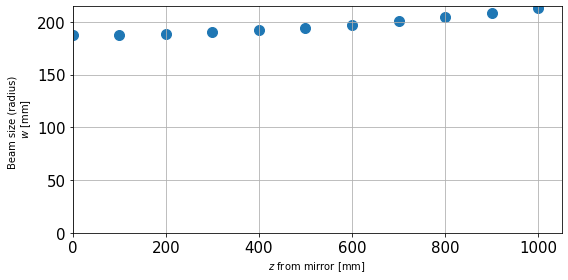

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.scatter(z_mirror_list/mm, beamsize_mirror_list/mm, s=100)
ax.set_xlabel('$z$ from mirror [mm]')
ax.set_ylabel('Beam size (radius) \n $w$ [mm]')
ax.grid(True)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
fig.tight_layout()

# Plot CST data

## Functions

In [16]:
def read_CST(filepath, datatype='', verbose=0):
    data = {}
    keys = []
    n_skipline = 0
    if datatype == '3D_E-field':
        keys = ['x', 'y', 'z', 'ExRe', 'ExIm', 'EyRe', 'EyIm', 'EzRe', 'EzIm']
        data = { key: [] for key in keys }
        n_skipline = 2
    elif datatype == '3D_twovalue':
        keys = ['x', 'y', 'z', 'val0', 'val1']
        data = { key: [] for key in keys }
        n_skipline = 2
    else:
        print(f'Error!! There is no datatype for "{datatype}".')
        return -1
        pass
    if verbose > 0: print(f'keys = {keys}')
    
    with open(filepath) as f:
        fin = list( csv.reader(f, delimiter=' ', skipinitialspace=True) )
        for n, line in enumerate(fin):
            if n < n_skipline:
                if verbose > 1: print(f'skip line {n}')
                continue;
            if verbose > 1: print('line:', line)
            for k, key in enumerate(keys):
                data[key].append( float( line[k] ) )
                if verbose > 3: print(f'append data [{key}] = {data[key][-1]}')
                pass
            pass
        pass
    
    # Change to array
    for key in keys:
        data[key] = np.array( data[key] )
        pass
    
    return data

def slice_file(infile, indir, slicekey='x', slice_val=0.):
    _infile_path = f'{indir}/{infile}'
    _data = read_CST(_infile_path, '3D_twovalue' )
    _data_slice = getSlice(_data, slicekey=slicekey, slice_val=slice_val)
    
    return _data_slice

In [17]:
from scipy.interpolate import griddata
from matplotlib import ticker, cm, colors
colorbarFormat='%.1e'
colorbar_frac=0.2

def plot2D_Eyz(data, logz=False, figsize=(8*(1.+colorbar_frac), 8.), levels=None):
    x_list = np.unique(data['x'])
    y_list = np.unique(data['y'])
    z_list = np.unique(data['z'])
    func.print_list(x_list)
    func.print_list(y_list)
    func.print_list(z_list)

    print(y_list.tolist())
    print(z_list.tolist())

    y_grid, z_grid = np.meshgrid(y_list, z_list)

    EyRe = griddata((data['y'], data['z']), data['EyRe'], (y_grid, z_grid))
    EzRe = griddata((data['y'], data['z']), data['EzRe'], (y_grid, z_grid))
    EyIm = griddata((data['y'], data['z']), data['EyIm'], (y_grid, z_grid))
    EzIm = griddata((data['y'], data['z']), data['EzIm'], (y_grid, z_grid))

    Ey_Mag = np.sqrt( np.power(EyRe, 2.) + np.power(EyIm, 2.) )
    Ez_Mag = np.sqrt( np.power(EzRe, 2.) + np.power(EzIm, 2.) )
    E_Mag = np.sqrt( np.power(Ey_Mag, 2.) + np.power(Ez_Mag, 2.) )

    fig, ax = plt.subplots(1,1,figsize=figsize)
    
    locator=ticker.LogLocator() if logz else ticker.MaxNLocator()
    cs = ax.contourf(y_grid, z_grid, E_Mag, levels=levels, cmap='jet', locator=locator)
    cbar = fig.colorbar(cs, ax=ax, format=colorbarFormat, fraction=colorbar_frac)
    cbar.ax.tick_params(labelsize=12)
    ax.set_aspect('equal')
    plt.gca().set_aspect('equal')
    fig.tight_layout()
    
    return fig, ax


def plot2D_key(data, keys=['y', 'z', 'val0'], figsize=(8*(1+colorbar_frac),8), logz=False, levels=None):
    x = data[keys[0]]
    y = data[keys[1]]
    x_list = np.unique(x)
    y_list = np.unique(y)
    func.print_list(x_list)
    func.print_list(y_list)

    x_grid, y_grid = np.meshgrid(x_list, y_list)

    z_grid = griddata((x, y), data[keys[2]], (x_grid, y_grid))

    fig, ax = plt.subplots(1,1,figsize=figsize)
    
    locator=ticker.LogLocator() if logz else ticker.MaxNLocator()
    cs = ax.contourf(x_grid, y_grid, z_grid, levels=levels, cmap='jet', locator=locator)
    cbar = fig.colorbar(cs, ax=ax, format=colorbarFormat, fraction=colorbar_frac)
    cbar.ax.tick_params(labelsize=12)
    ax.set_aspect('equal')
    plt.gca().set_aspect('equal')
    fig.tight_layout()
    
    return fig, ax

In [18]:
def get_index_data(data, indices):
    newdata = {}
    for _c in data.keys():
        if isinstance(data[_c], list) or isinstance(data[_c], np.ndarray):
            newdata[_c] = data[_c][indices]
        else:
            newdata[_c] = data[_c]
            pass
        pass
    return newdata

def getSlice(data, slicekey='x', slice_val=0.):
    val = data[slicekey]
    diff = np.abs(val - slice_val)
    min_diff = min(diff)+0.01
    slice_index = np.where( diff < min_diff )[0]
    print(f'getSlice min_diff = {min_diff}')
    data_slice = get_index_data(data, slice_index)
    return data_slice

In [19]:
import lmfit

def gauss_fit(x, y, x_fit_range=None, xlim=None, verbose=0):
    
    if x_fit_range is not None:
        _index = np.where( (x >x_fit_range[0] ) & (x < x_fit_range[1]) )
        _x = x[_index]
        _y = y[_index]
    else:
        _x = x
        _y = y
        pass
    
    model = lmfit.models.ConstantModel() +  lmfit.models.GaussianModel()
    
    params = model.make_params()
    params['c'].set(value=0., min=0., max=1000, vary=False)
    params['amplitude'].set(value=max(y), min=0., max=None, vary=True)
    params['sigma'].set(value=20., min=0., max=1000., vary=True)
    params['center'].set(value=x[np.where(y==max(y))][0], min=-1000., max=1000, vary=True)
    
    result = model.fit(x=_x, data=_y, weights=None, params=params, method='leastsq')

    if verbose > 0:
        print(params)
        print(result.fit_report())
        print(result.ci_report())
        pass
    
    fig = result.plot(data_kws={'markersize': 5})
    fig.set_figwidth(12)
    fig.set_figheight(4)
    axes = fig.get_axes()
    
    xlim = [min(x), max(x)] if xlim is None else xlim
    axes[1].scatter(x, y, lw=1, c='tab:blue', s=10)
    axes[0].set_xlim(xlim)
    axes[1].set_xlim(xlim)
    axes[0].grid(True)
    axes[1].grid(True)
    
    fig.tight_layout()
    
    return result

# Convert: gaussian sigma ( exp(-x^2/2sigma^2) ) to  beam size ( E = E0 exp(-x^2/w^2) )
def sigma2beamsize(sigma):
    return np.sqrt(2.) * sigma

## v1-6

### v1-6 Simulation Expectation

In [20]:
_w0 = antenna_w0A
_f_mirror = 132.676*mm # focal distance setup in the CST simulation
_R_mirror = 2 * _f_mirror
_z_mirror = 247.499*mm # mirror distance from beam waist at the antenna
_w_mirror = calc_beamwaist(w0=_w0, z=_z_mirror, wavelength=wavelength) # beam size (radius) @ mirror
_L_waist = 86.362*mm # distance between the beam waist and antenna bottom (boundary betweeen waveguide and taper sections)
_D_mirror = 1200*mm # diameter of the mirror
_slant_angle = np.deg2rad(60.)

print(f'Beam waist @ antenna   w0 = {_w0/mm:.3f} mm')
print(f'z @ mirror              z = {_z_mirror/mm:.3f} mm')
print(f'beam size @ mirror      w = {_w_mirror/mm:.3f} mm')
print(f'Focal distance          f = {_f_mirror/mm} mm')
print(f'Curvature of the mirror R = {_R_mirror/mm} mm')
print(f'Slant angle               = {np.rad2deg(_slant_angle):.0f} deg')

Beam waist @ antenna   w0 = 35.619 mm
z @ mirror              z = 247.499 mm
beam size @ mirror      w = 137.315 mm
Focal distance          f = 132.676 mm
Curvature of the mirror R = 265.352 mm
Slant angle               = 60 deg


z_antenna_list (after antenna) = [  0.  10.  20. ... 220. 230. 240.] mm
beamsize_antenna_list (after antenna) = [ 35.61894238  36.01970962  37.19611208 ... 123.14444546 128.28298229
 133.43880054] mm


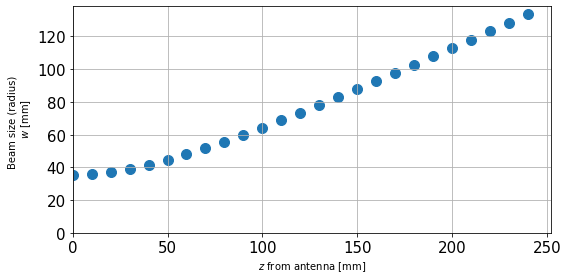

In [21]:
# beam size between antenna and mirror
_z0 = 0.
_dz = 10*mm
z_antenna_list6 = np.arange(0*mm, _z_mirror, _dz)  # z position from reflection
beamsize_antenna_list6 = calc_beamwaist(z=z_antenna_list6, w0=_w0, wavelength=wavelength)
print(f'z_antenna_list (after antenna) = {z_antenna_list6/mm} mm')
print(f'beamsize_antenna_list (after antenna) = {beamsize_antenna_list6/mm} mm')

fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.scatter(z_antenna_list6/mm, beamsize_antenna_list6/mm, s=100)
ax.set_xlabel('$z$ from antenna [mm]')
ax.set_ylabel('Beam size (radius) \n $w$ [mm]')
ax.grid(True)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
fig.tight_layout()

In [22]:
height_after_ref6 = 2*_f_mirror / np.sin(_slant_angle) * np.abs(np.cos(_slant_angle) - 1.)
print(f'height after reflection for v1-6 = {height_after_ref6/mm} mm')

z_mirror_list6 = np.arange(0*mm, 1000*mm+_dz, _dz)  # z position from reflection
beamsize_mirror_list6 = calc_beamwaist(z=z_mirror_list6, w0=_w_mirror, wavelength=wavelength)
print(f'z_mirror_list (after mirror) = {z_mirror_list6/mm} mm')
print(f'beamsize_mirror_list (after mirror) = {beamsize_mirror_list6/mm} mm')

height after reflection for v1-6 = 153.20104863000554 mm
z_mirror_list (after mirror) = [   0.   10.   20. ...  980.  990. 1000.] mm
beamsize_mirror_list (after mirror) = [137.31531693 137.32235095 137.34345085 ... 193.41294817 194.39427577
 195.38056199] mm


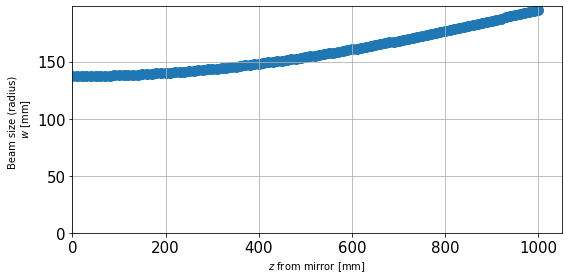

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.scatter(z_mirror_list6/mm, beamsize_mirror_list6/mm, s=100)
ax.set_xlabel('$z$ from mirror [mm]')
ax.set_ylabel('Beam size (radius) \n $w$ [mm]')
ax.grid(True)
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
fig.tight_layout()

### v1-6 Data

In [24]:
indir = 'input/CST/v1-6'
infile_list = [
    'e-field_abs_ave_w200.dat',
    'e-field_abs_ave_w400.dat',
    'e-field_abs_ave_w600.dat',
    'e-field_abs_ave_w700.dat',
]
w_list=np.array([200*mm, 400*mm, 600*mm, 700*mm])
label_list = [ f'z={_w/mm:.0f} mm' for _w in w_list ]

data6_list = []
slicedata6_list = []
for _infile in infile_list:
    data6_list.append(read_CST(f'{indir}/{_infile}', '3D_twovalue'))
    slicedata6_list.append( slice_file(_infile, indir, 'x', 0.))
    pass

getSlice min_diff = 2.5109
getSlice min_diff = 2.5109
getSlice min_diff = 2.5109
getSlice min_diff = 2.5109


x_list (size=(632,)) = [-1578.1 -1573.1 -1568.1 ...  1568.1  1573.1  1578.1]
y_list (size=(632,)) = [-1578.1 -1573.1 -1568.1 ...  1568.1  1573.1  1578.1]


/tmp/ipykernel_1577213/4191764218.py:56: UserWarning: Log scale: values of z <= 0 have been masked
  cs = ax.contourf(x_grid, y_grid, z_grid, levels=levels, cmap='jet', locator=locator)


x_list (size=(632,)) = [-1578.1 -1573.1 -1568.1 ...  1568.1  1573.1  1578.1]
y_list (size=(632,)) = [-1578.1 -1573.1 -1568.1 ...  1568.1  1573.1  1578.1]
x_list (size=(632,)) = [-1578.1 -1573.1 -1568.1 ...  1568.1  1573.1  1578.1]
y_list (size=(632,)) = [-1578.1 -1573.1 -1568.1 ...  1568.1  1573.1  1578.1]
x_list (size=(632,)) = [-1578.1 -1573.1 -1568.1 ...  1568.1  1573.1  1578.1]
y_list (size=(632,)) = [-1578.1 -1573.1 -1568.1 ...  1568.1  1573.1  1578.1]


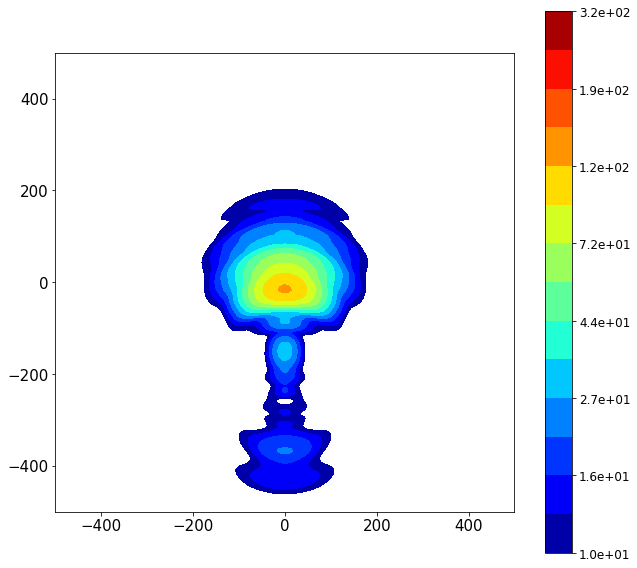

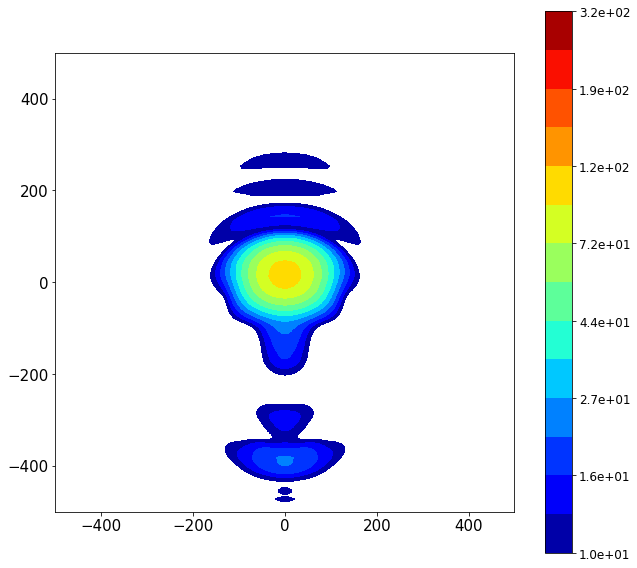

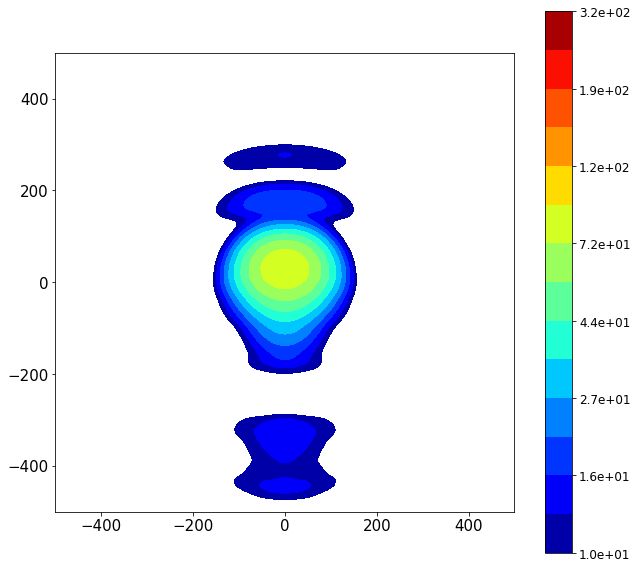

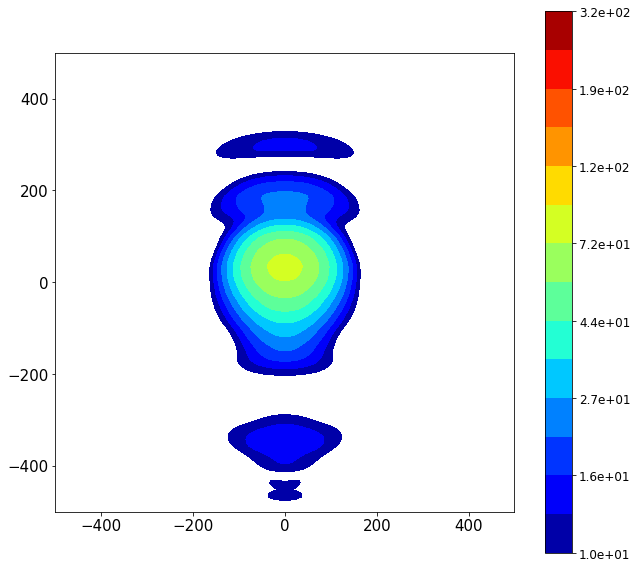

In [25]:
for i, _label in enumerate(label_list):
    fig, ax = plot2D_key(data6_list[i], keys=['x', 'y', 'val0'], logz=True, levels=np.power(10., np.linspace(10, 25, 15)/10))

    xlim = [-500, 500]
    ylim = [-500, 500]
    zlim = [0.1, None]
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    pass

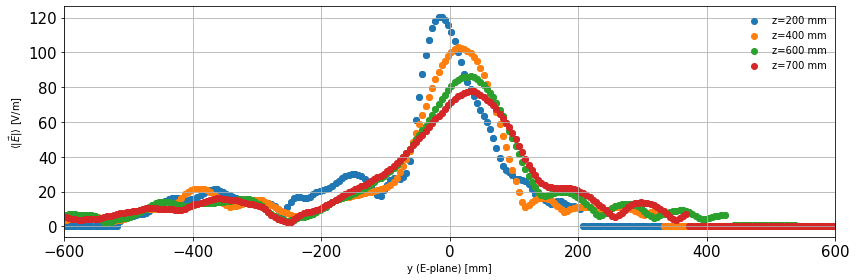

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(12,4))
for _label, _data in zip(label_list, slicedata6_list):
    ax.scatter( _data['y'], _data['val0'], label=_label )
    pass
ax.set_xlim([-D_mirror/mm/2., D_mirror/mm/2.])
ax.legend(frameon=False)
ax.grid(True)
ax.set_xlabel('y (E-plane) [mm]')
ax.set_ylabel(r'$\langle |\vec{E}| \rangle$ [V/m]')
fig.tight_layout()

Beam size @ power = 1/e = 67.68 mm
Beam size @ power = 1/e = 86.42 mm
Beam size @ power = 1/e = 108.37 mm
Beam size @ power = 1/e = 128.83 mm


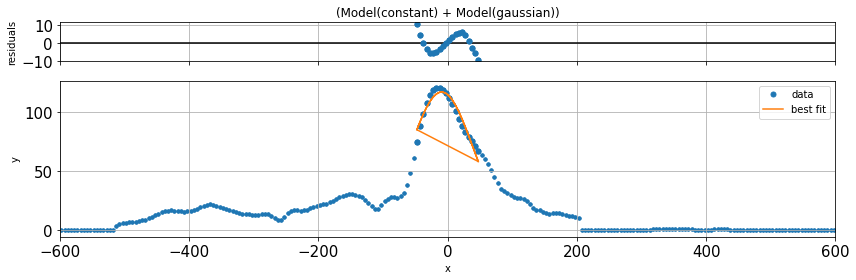

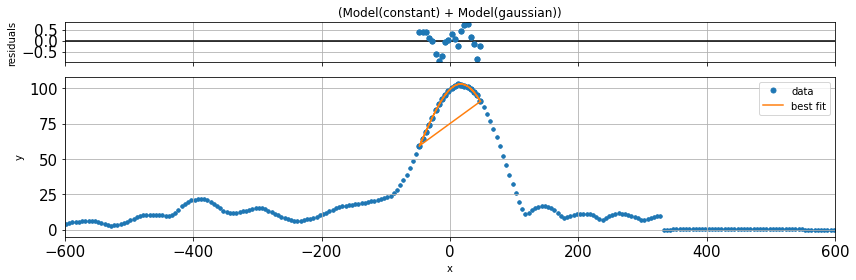

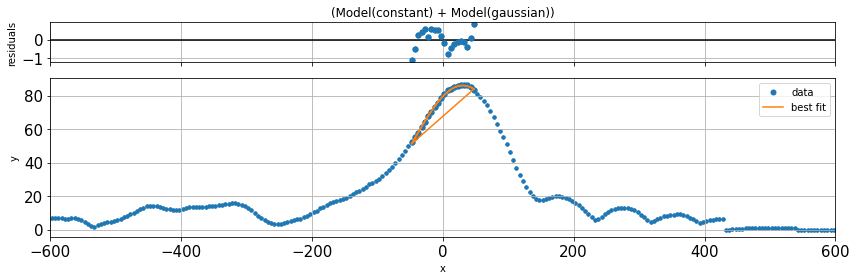

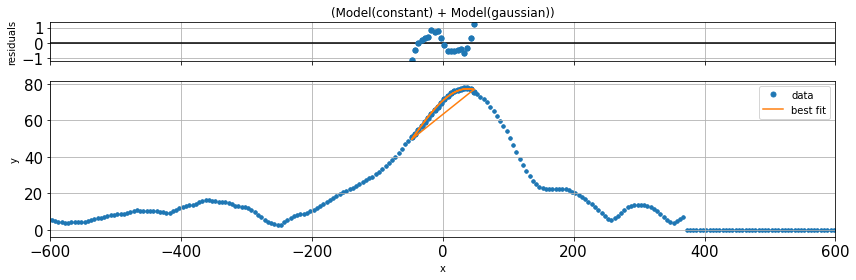

In [27]:
fitresult6_list = []
beamsize6_list = []
for _label, _data in zip(label_list, slicedata6_list):
    _x = _data['y']
    _y = _data['val0']
    _result = gauss_fit(_x, _y, x_fit_range=[-50, 50], xlim=[-D_mirror/mm/2, D_mirror/mm/2])
    fitresult6_list.append( _result )
    beamsize6_list.append( sigma2beamsize( _result.result.params['sigma'].value ) )
    
    print(f'Beam size @ power = 1/e = {beamsize6_list[-1]:.2f} mm')
    pass

[0.   0.01 0.02 ... 0.98 0.99 1.  ]
[0.2 0.4 0.6 0.7]
0.247499
[0.447499 0.647499 0.847499 0.947499]


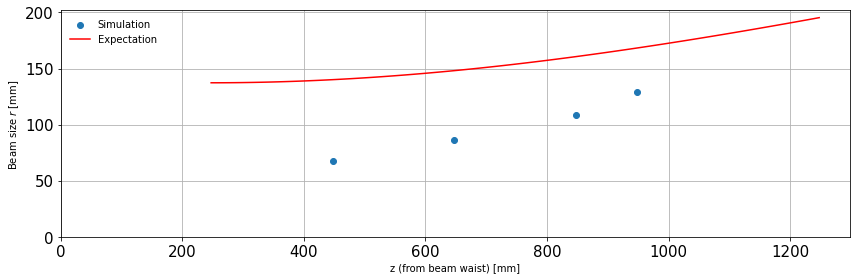

In [28]:
# Expectation
z_exp_list = z_mirror_list6 + _z_mirror
# Simulation
z_list = w_list + _z_mirror
print(z_mirror_list6)
print(w_list)
print(_z_mirror)
print(z_list)

# Plot Simulation v.s. Expectation
fig, ax = plt.subplots(1, 1, figsize=(12,4))
ax.scatter(z_list[0:]/mm, beamsize6_list[0:], label='Simulation')
ax.plot(z_exp_list/mm, beamsize_mirror_list6/mm, label='Expectation', c='red')
ax.legend(frameon=False)
ax.grid(True)
ax.set_xlabel('z (from beam waist) [mm]')
ax.set_ylabel('Beam size $r$ [mm]')
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
fig.tight_layout()

### v1-6-2 Data

In [29]:
indir = 'input/CST/v1-6-2'
infile_list = [
    'e-field_abs_ave_w200.dat',
    'e-field_abs_ave_w400.dat',
    'e-field_abs_ave_w500.dat',
]
w_list=np.array([200*mm, 400*mm, 500*mm])
label_list = [ f'z={_w/mm:.0f} mm' for _w in w_list ]

data62_list = []
slicedata62_list = []
for _infile in infile_list:
    data62_list.append(read_CST(f'{indir}/{_infile}', '3D_twovalue'))
    slicedata62_list.append( slice_file(_infile, indir, 'x', 0.))
    pass

getSlice min_diff = 2.5105
getSlice min_diff = 2.5105
getSlice min_diff = 0.01


x_list (size=(686,)) = [-1712.8 -1707.8 -1702.8 ...  1702.8  1707.8  1712.8]
y_list (size=(686,)) = [-1712.8 -1707.8 -1702.8 ...  1702.8  1707.8  1712.8]


/tmp/ipykernel_1577213/4191764218.py:56: UserWarning: Log scale: values of z <= 0 have been masked
  cs = ax.contourf(x_grid, y_grid, z_grid, levels=levels, cmap='jet', locator=locator)


x_list (size=(686,)) = [-1712.8 -1707.8 -1702.8 ...  1702.8  1707.8  1712.8]
y_list (size=(686,)) = [-1712.8 -1707.8 -1702.8 ...  1702.8  1707.8  1712.8]
x_list (size=(687,)) = [-1714.3 -1709.3 -1704.3 ...  1704.3  1709.3  1714.3]
y_list (size=(687,)) = [-1714.3 -1709.3 -1704.3 ...  1704.3  1709.3  1714.3]
Beam size @ power = 1/e = 137.43 mm
Beam size @ power = 1/e = 89.99 mm
Beam size @ power = 1/e = 121.24 mm


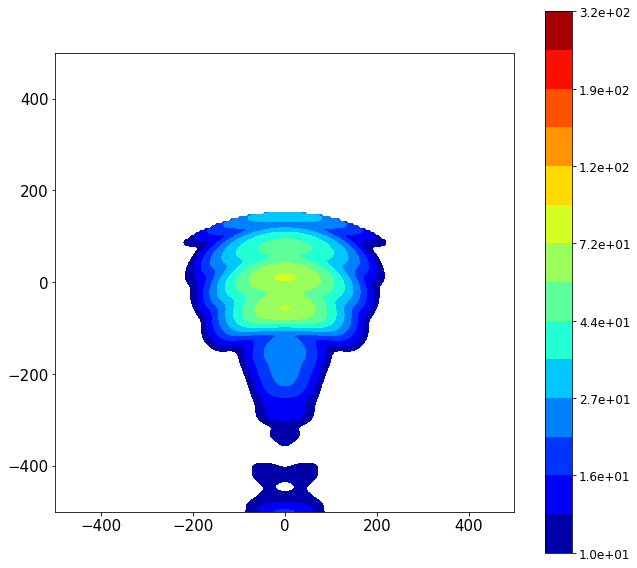

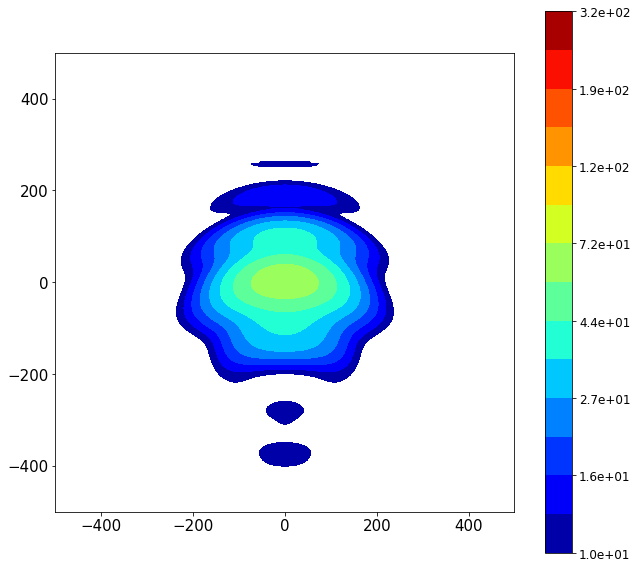

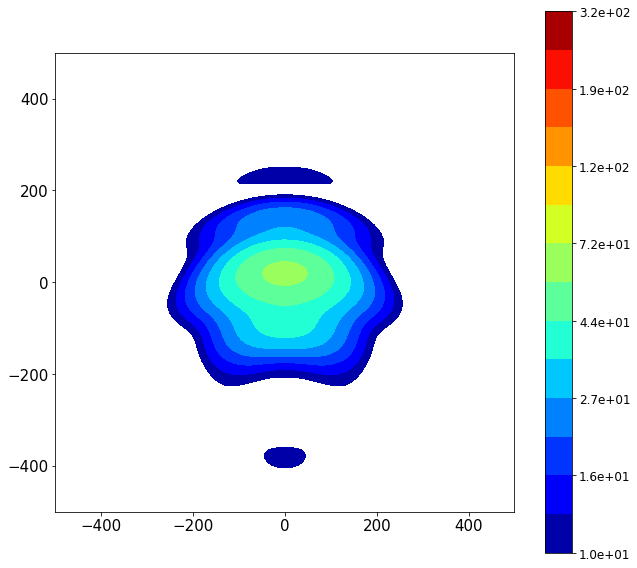

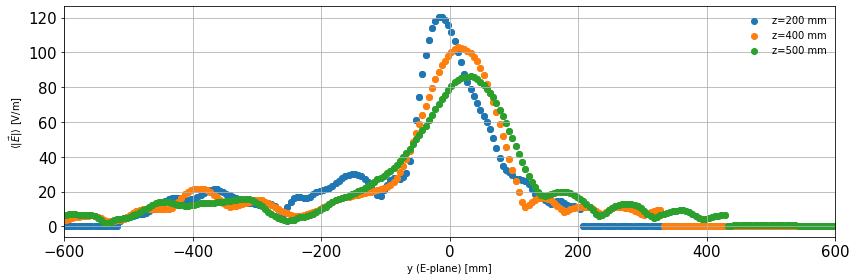

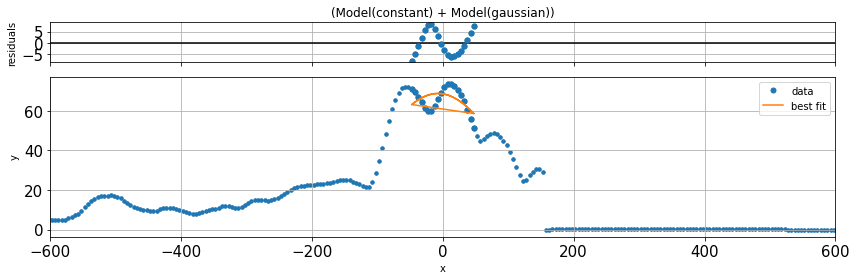

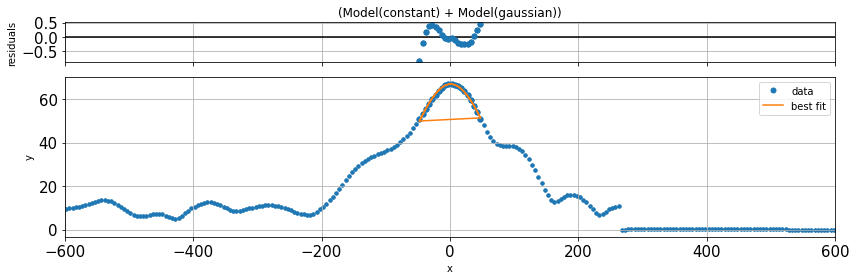

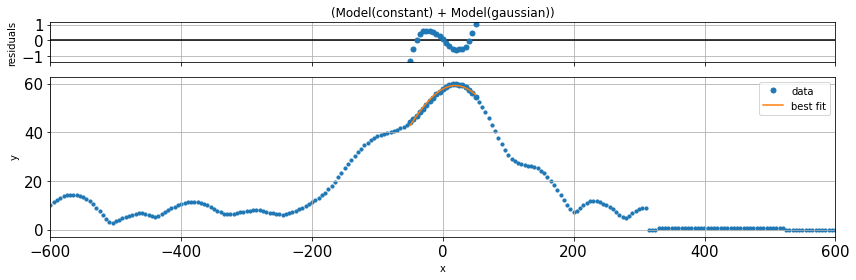

In [30]:
for i, _label in enumerate(label_list):
    fig, ax = plot2D_key(data62_list[i], keys=['x', 'y', 'val0'], logz=True, levels=np.power(10., np.linspace(10, 25, 15)/10))

    xlim = [-500, 500]
    ylim = [-500, 500]
    zlim = [0.1, None]
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    pass

fig, ax = plt.subplots(1, 1, figsize=(12,4))
for _label, _data in zip(label_list, slicedata6_list):
    ax.scatter( _data['y'], _data['val0'], label=_label )
    pass
ax.set_xlim([-D_mirror/mm/2., D_mirror/mm/2.])
ax.legend(frameon=False)
ax.grid(True)
ax.set_xlabel('y (E-plane) [mm]')
ax.set_ylabel(r'$\langle |\vec{E}| \rangle$ [V/m]')
fig.tight_layout()


fitresult62_list = []
beamsize62_list = []
for _label, _data in zip(label_list, slicedata62_list):
    _x = _data['y']
    _y = _data['val0']
    _result = gauss_fit(_x, _y, x_fit_range=[-50, 50], xlim=[-D_mirror/mm/2, D_mirror/mm/2])
    fitresult62_list.append( _result )
    beamsize62_list.append( sigma2beamsize( _result.result.params['sigma'].value ) )
    
    print(f'Beam size @ power = 1/e = {beamsize62_list[-1]:.2f} mm')
    pass

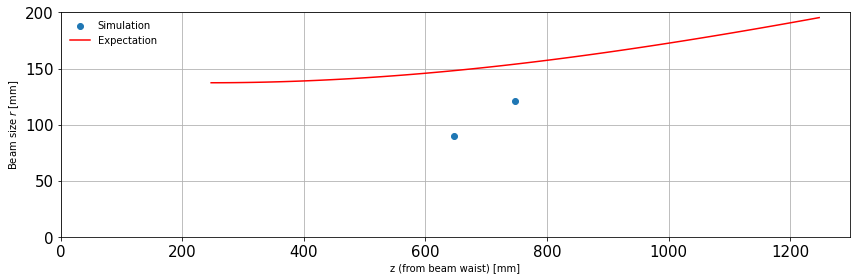

In [52]:
# Expectation
z_exp_list = z_mirror_list6 + _z_mirror
# Simulation
z_list = w_list + _z_mirror

# Plot Simulation v.s. Expectation
fig, ax = plt.subplots(1, 1, figsize=(12,4))
ax.scatter(z_list[1:]/mm, beamsize62_list[1:], label='Simulation')
ax.plot(z_exp_list/mm, beamsize_mirror_list6/mm, label='Expectation', c='red')
ax.legend(frameon=False)
ax.grid(True)
ax.set_xlabel('z (from beam waist) [mm]')
ax.set_ylabel('Beam size $r$ [mm]')
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
fig.tight_layout()

### v1-6-3 Data
Long background space in z-axis

In [36]:
_indir = 'input/CST/v1-6-3'
_w_list_mm = np.array([200, 400, 500, 600, 700, 800, 1000])
_w_list= _w_list_mm * mm
_infile_list = [ f'e-field_abs_ave_w{w_mm}.dat' for w_mm in _w_list_mm ]
_label_list = [ f'z={_w:.0f} mm' for _w in _w_list_mm ]

data63_list = []
slicedata63_list = []
for _infile in _infile_list:
    print(_infile)
    data63_list.append(read_CST(f'{_indir}/{_infile}', '3D_twovalue', verbose=0))
    slicedata63_list.append( slice_file(_infile, _indir, 'x', 0.))
    pass

e-field_abs_ave_w200.dat
getSlice min_diff = 0.01
e-field_abs_ave_w400.dat
getSlice min_diff = 0.01
e-field_abs_ave_w500.dat
getSlice min_diff = 0.01
e-field_abs_ave_w600.dat
getSlice min_diff = 0.01
e-field_abs_ave_w700.dat
getSlice min_diff = 0.01
e-field_abs_ave_w800.dat
getSlice min_diff = 0.01
e-field_abs_ave_w1000.dat
getSlice min_diff = 0.01


x_list (size=(1237,)) = [-3088.8 -3083.8 -3078.8 ...  3078.8  3083.8  3088.8]
y_list (size=(1237,)) = [-3088.8 -3083.8 -3078.8 ...  3078.8  3083.8  3088.8]


/tmp/ipykernel_1577213/4191764218.py:56: UserWarning: Log scale: values of z <= 0 have been masked
  cs = ax.contourf(x_grid, y_grid, z_grid, levels=levels, cmap='jet', locator=locator)


x_list (size=(1237,)) = [-3088.8 -3083.8 -3078.8 ...  3078.8  3083.8  3088.8]
y_list (size=(1237,)) = [-3088.8 -3083.8 -3078.8 ...  3078.8  3083.8  3088.8]
x_list (size=(1237,)) = [-3088.8 -3083.8 -3078.8 ...  3078.8  3083.8  3088.8]
y_list (size=(1237,)) = [-3088.8 -3083.8 -3078.8 ...  3078.8  3083.8  3088.8]
x_list (size=(1237,)) = [-3088.8 -3083.8 -3078.8 ...  3078.8  3083.8  3088.8]
y_list (size=(1237,)) = [-3088.8 -3083.8 -3078.8 ...  3078.8  3083.8  3088.8]
x_list (size=(1237,)) = [-3088.8 -3083.8 -3078.8 ...  3078.8  3083.8  3088.8]
y_list (size=(1237,)) = [-3088.8 -3083.8 -3078.8 ...  3078.8  3083.8  3088.8]
x_list (size=(1237,)) = [-3088.8 -3083.8 -3078.8 ...  3078.8  3083.8  3088.8]
y_list (size=(1237,)) = [-3088.8 -3083.8 -3078.8 ...  3078.8  3083.8  3088.8]
x_list (size=(1237,)) = [-3088.8 -3083.8 -3078.8 ...  3078.8  3083.8  3088.8]
y_list (size=(1237,)) = [-3088.8 -3083.8 -3078.8 ...  3078.8  3083.8  3088.8]


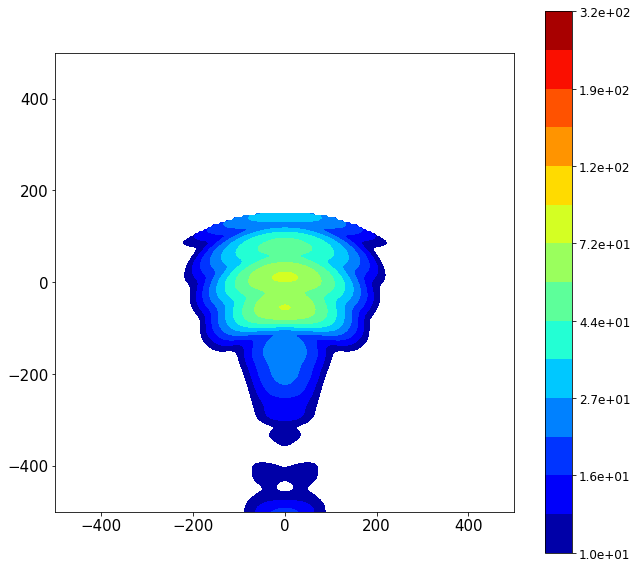

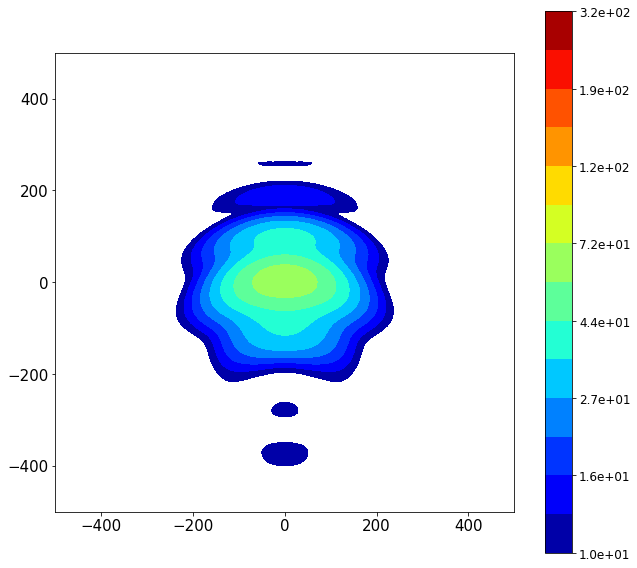

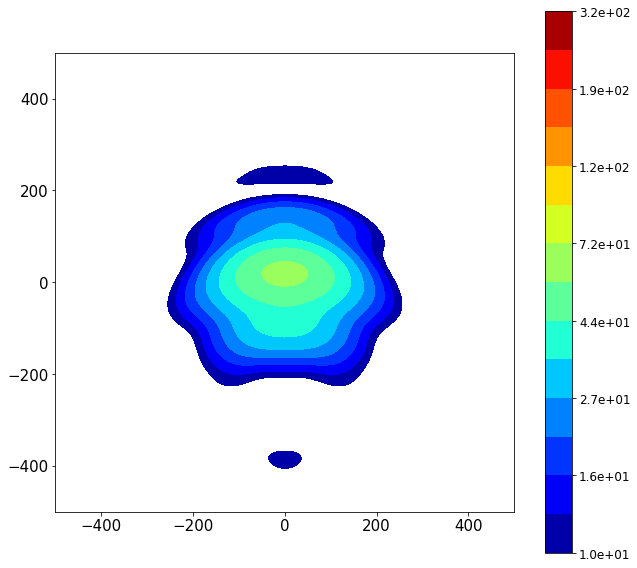

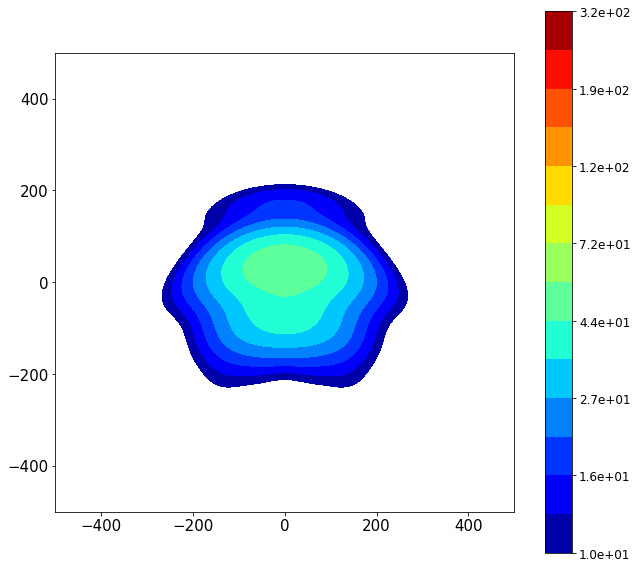

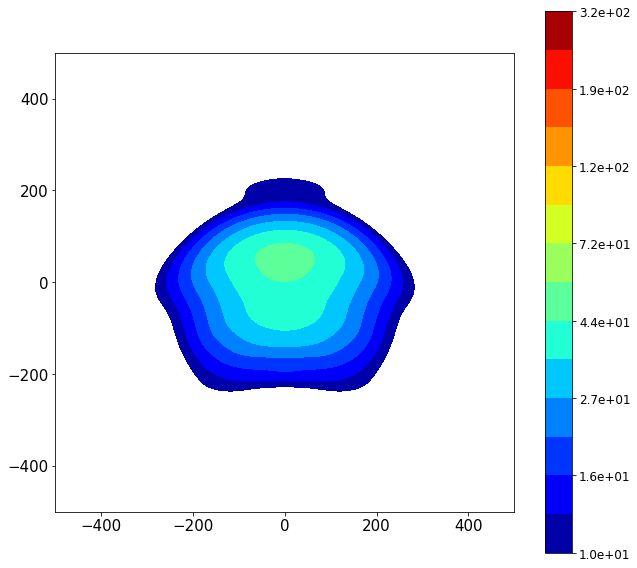

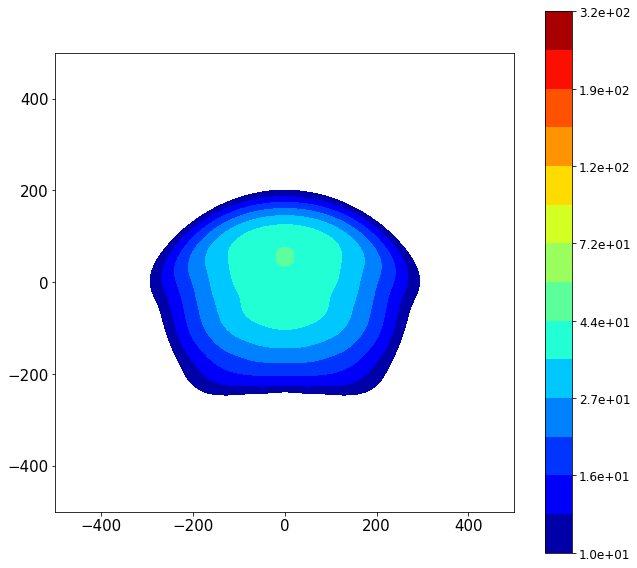

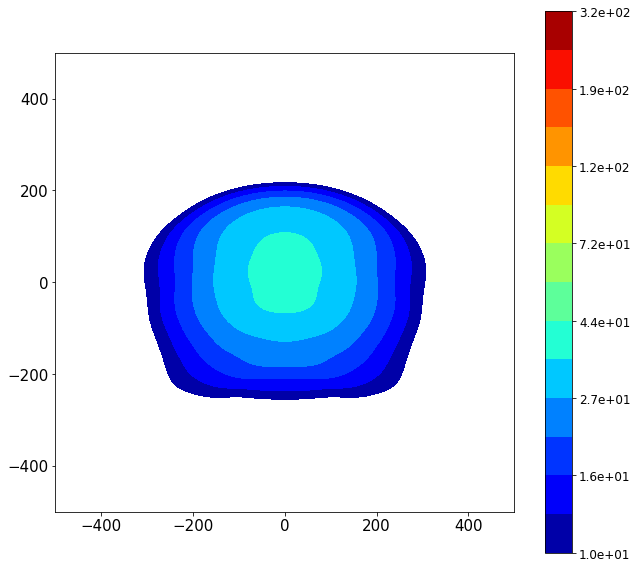

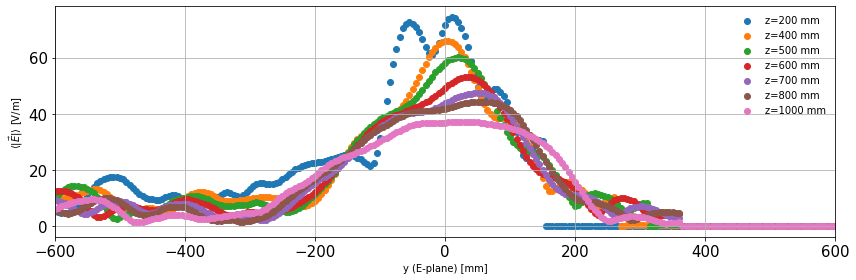

In [46]:
for i, _label in enumerate(_label_list):
    fig, ax = plot2D_key(data63_list[i], keys=['x', 'y', 'val0'], logz=True, levels=np.power(10., np.linspace(10, 25, 15)/10))

    xlim = [-500, 500]
    ylim = [-500, 500]
    zlim = [0.1, None]
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    pass

fig, ax = plt.subplots(1, 1, figsize=(12,4))
for _label, _data in zip(_label_list, slicedata63_list):
    ax.scatter( _data['y'], _data['val0'], label=_label )
    pass
ax.set_xlim([-D_mirror/mm/2., D_mirror/mm/2.])
ax.legend(frameon=False)
ax.grid(True)
ax.set_xlabel('y (E-plane) [mm]')
ax.set_ylabel(r'$\langle |\vec{E}| \rangle$ [V/m]')
fig.tight_layout()

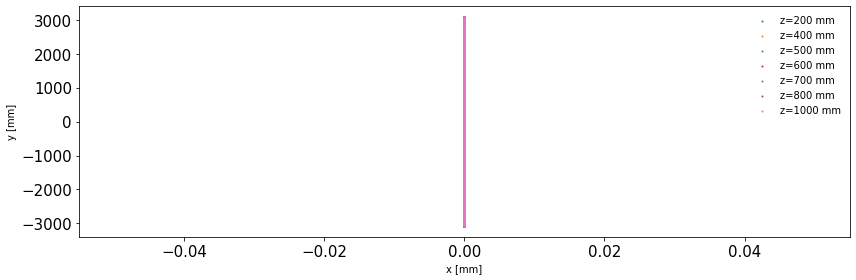

In [48]:
fig, ax = plt.subplots(1,1,figsize=(12,4))
for i, _label in enumerate(_label_list):
    ax.scatter(slicedata63_list[i]['x'], slicedata63_list[i]['y'], s=1, label=_label)
    ax.set_xlabel('x [mm]')
    ax.set_ylabel('y [mm]')
    ax.legend(frameon=False)
    pass
fig.tight_layout()

x @ y max = 9.9962
Beam size @ power = 1/e = 90.91 mm
x @ y max = 4.9981
Beam size @ power = 1/e = 89.14 mm
x @ y max = 19.992
Beam size @ power = 1/e = 105.88 mm
x @ y max = 34.987
Beam size @ power = 1/e = 117.52 mm
x @ y max = 54.979
Beam size @ power = 1/e = 129.08 mm
x @ y max = 49.981
Beam size @ power = 1/e = 202.69 mm
x @ y max = 24.991
Beam size @ power = 1/e = 350.95 mm


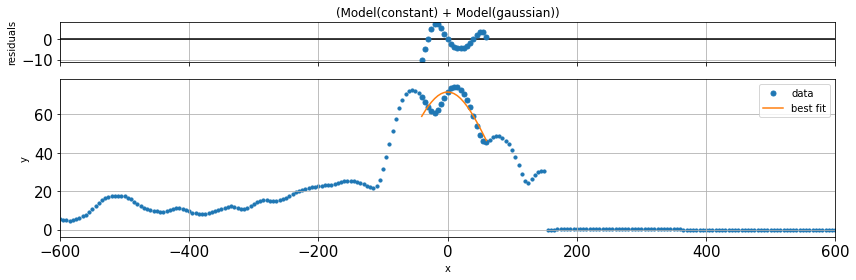

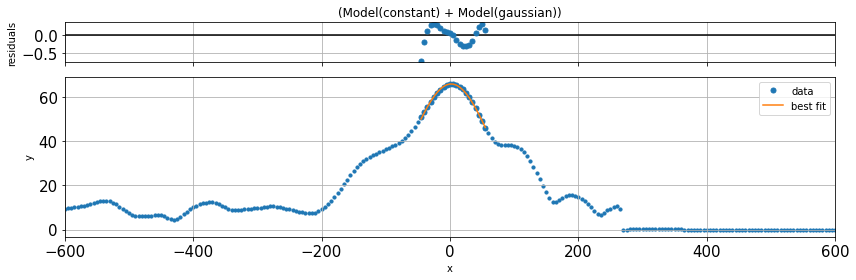

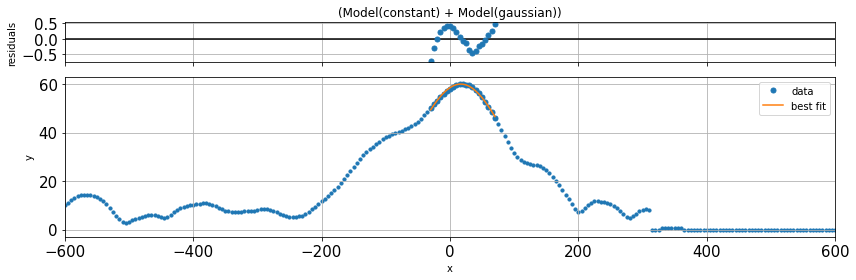

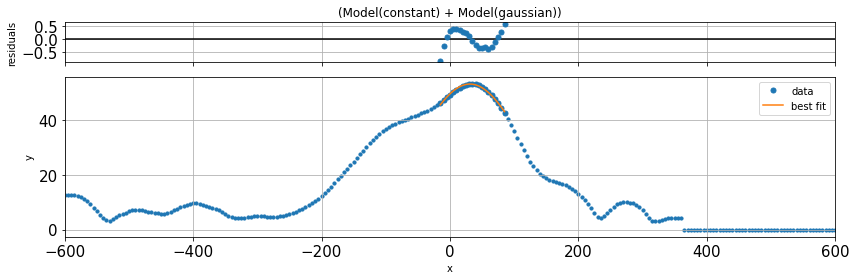

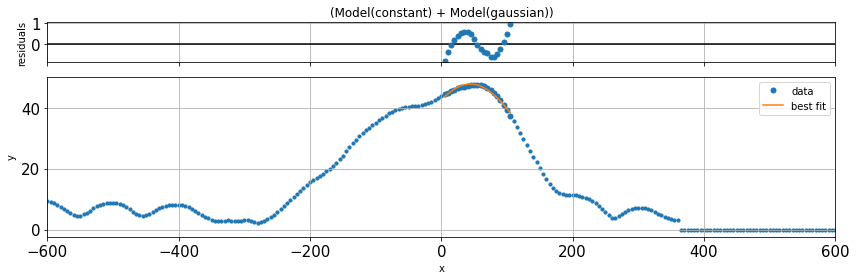

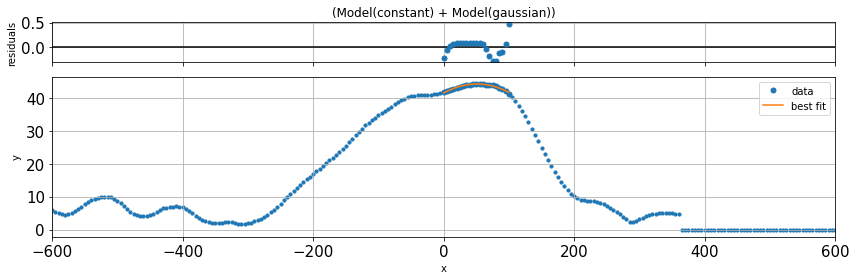

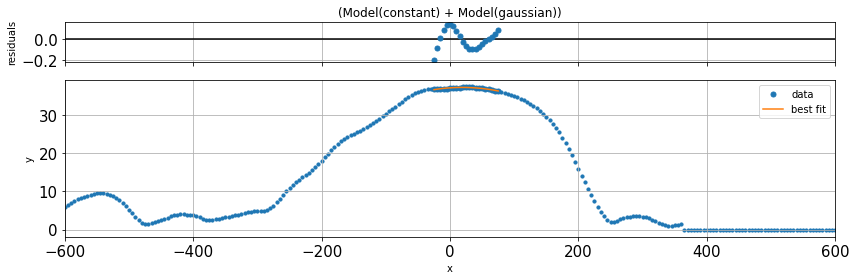

In [51]:
fitresult63_list = []
beamsize63_list = []
for _label, _data in zip(_label_list, slicedata63_list):
    _x = _data['y']
    _y = _data['val0']
    _ymax = np.max(_y)
    _i_ymax = np.where(_y==_ymax)
    _x_ymax = _x[_i_ymax][0]
    print(f'x @ y max = {_x_ymax}')
    _result = gauss_fit(_x, _y, x_fit_range=[_x_ymax-50, _x_ymax+50], xlim=[-D_mirror/mm/2, D_mirror/mm/2])
    fitresult63_list.append( _result )
    beamsize63_list.append( sigma2beamsize( _result.result.params['sigma'].value ) )
    
    print(f'Beam size @ power = 1/e = {beamsize63_list[-1]:.2f} mm')
    pass

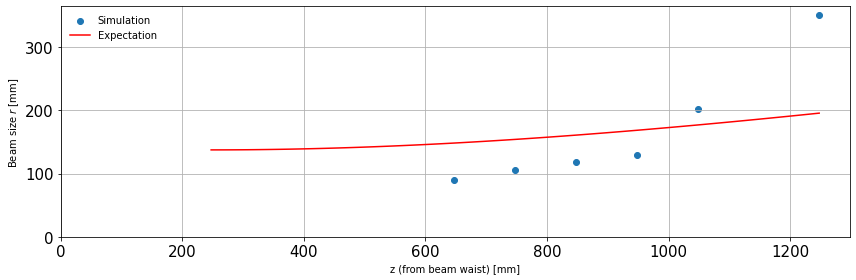

In [53]:
# Expectation
z_exp_list6 = z_mirror_list6 + _z_mirror
# Simulation
z_list63 = _w_list + _z_mirror

# Plot Simulation v.s. Expectation
fig, ax = plt.subplots(1, 1, figsize=(12,4))
ax.scatter(z_list63[1:]/mm, beamsize63_list[1:], label='Simulation')
ax.plot(z_exp_list6/mm, beamsize_mirror_list6/mm, label='Expectation', c='red')
ax.legend(frameon=False)
ax.grid(True)
ax.set_xlabel('z (from beam waist) [mm]')
ax.set_ylabel('Beam size $r$ [mm]')
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
fig.tight_layout()

## v1-5

In [109]:
indir = 'input/CST/v1-5'
infile = 'e-field (f=5) [1].txt'

input_path = f'{indir}/{infile}'

In [110]:
data1 = read_CST(input_path, datatype='3D_E-field')
keys = data1.keys()
for key in keys:
    func.print_list(data1[key], key)
    pass

x (size=(425,)) = [0. 0. 0. ... 0. 0. 0.]
y (size=(425,)) = [-601.46356 -550.57056 -499.67756 ...  111.03844  161.93144  212.82444]
z (size=(425,)) = [-417.05637 -417.05637 -417.05637 ...  804.37563  804.37563  804.37563]
ExRe (size=(425,)) = [0. 0. 0. ... 0. 0. 0.]
ExIm (size=(425,)) = [0. 0. 0. ... 0. 0. 0.]
EyRe (size=(425,)) = [-0.89847147 -0.15182757 -0.35635296 ...  0.06949908  0.0364202
 -0.03237201]
EyIm (size=(425,)) = [-1.5022959   1.2722753  -0.4452036  ... -0.01437538  0.05879173
  0.05398229]
EzRe (size=(425,)) = [ 0.37161934  2.1522195   1.8131891  ... -0.53756082 -0.05141388
  0.48691243]
EzIm (size=(425,)) = [ 4.1743522   0.41694257 -0.92123669 ... -0.21194658 -0.57862556
 -0.31792182]


x_list (size=(1,)) = [0.]
y_list (size=(17,)) = [-601.46356   -550.57056   -499.67756   -448.78456   -397.89156
 -346.99856   -296.10556   -245.21256   -194.31956   -143.42656
  -92.533564   -41.640564     9.2524356   60.145436   111.03844
  161.93144    212.82444  ]
z_list (size=(25,)) = [-417.05637 -366.16337 -315.27037 ...  702.58963  753.48263  804.37563]
[-601.46356, -550.57056, -499.67756, -448.78456, -397.89156, -346.99856, -296.10556, -245.21256, -194.31956, -143.42656, -92.533564, -41.640564, 9.2524356, 60.145436, 111.03844, 161.93144, 212.82444]
[-417.05637, -366.16337, -315.27037, -264.37737, -213.48437, -162.59137, -111.69837, -60.805372, -9.912372, 40.980628, 91.873628, 142.76663, 193.65963, 244.55263, 295.44563, 346.33863, 397.23163, 448.12463, 499.01763, 549.91063, 600.80363, 651.69663, 702.58963, 753.48263, 804.37563]


/tmp/ipykernel_3387964/4191764218.py:31: UserWarning: Log scale: values of z <= 0 have been masked
  cs = ax.contourf(y_grid, z_grid, E_Mag, levels=levels, cmap='jet', locator=locator)


(<Figure size 576x288 with 2 Axes>, <Axes: >)

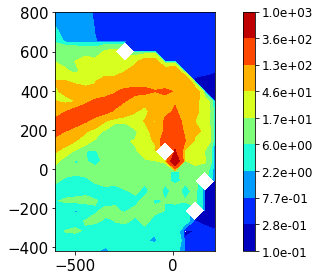

In [111]:
plot2D_Eyz(data1, figsize=(8,4), logz=True, levels=np.power(10, np.linspace(-1, 3, 10)))

In [112]:
infile = 'e-field_abs_ave_w200.dat'
input_path = f'{indir}/{infile}'
data2 = read_CST(input_path, '3D_twovalue' )

x_list (size=(655,)) = [-1635.7 -1630.7 -1625.7 ...  1625.7  1630.7  1635.7]
y_list (size=(655,)) = [-1635.7 -1630.7 -1625.7 ...  1625.7  1630.7  1635.7]


/tmp/ipykernel_3387964/4191764218.py:56: UserWarning: Log scale: values of z <= 0 have been masked
  cs = ax.contourf(x_grid, y_grid, z_grid, levels=levels, cmap='jet', locator=locator)


(-500.0, 500.0)

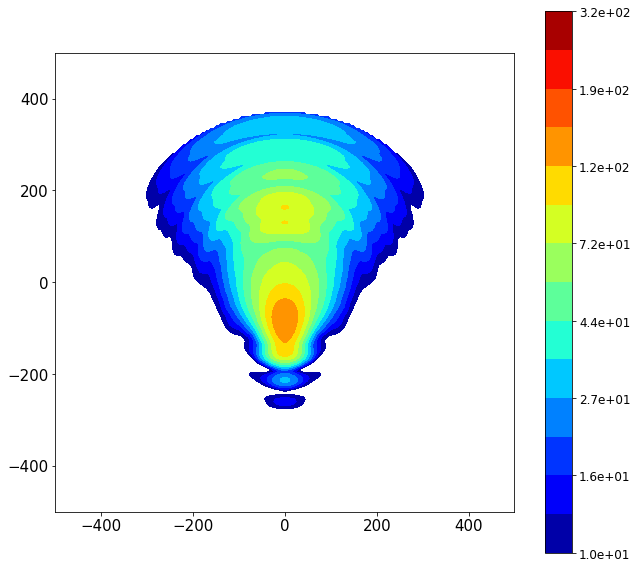

In [113]:
fig, ax = plot2D_key(data2, keys=['x', 'y', 'val0'], logz=True, levels=np.power(10., np.linspace(10, 25, 15)/10))

xlim = [-500, 500]
ylim = [-500, 500]
zlim = [0.1, None]
ax.set_xlim(xlim)
ax.set_ylim(ylim)

In [114]:
infile = 'e-field_abs_ave_w400.dat'
input_path = f'{indir}/{infile}'
data_w400 = read_CST(input_path, '3D_twovalue' )

x_list (size=(655,)) = [-1635.7 -1630.7 -1625.7 ...  1625.7  1630.7  1635.7]
y_list (size=(655,)) = [-1635.7 -1630.7 -1625.7 ...  1625.7  1630.7  1635.7]


/tmp/ipykernel_3387964/4191764218.py:56: UserWarning: Log scale: values of z <= 0 have been masked
  cs = ax.contourf(x_grid, y_grid, z_grid, levels=levels, cmap='jet', locator=locator)


(-500.0, 500.0)

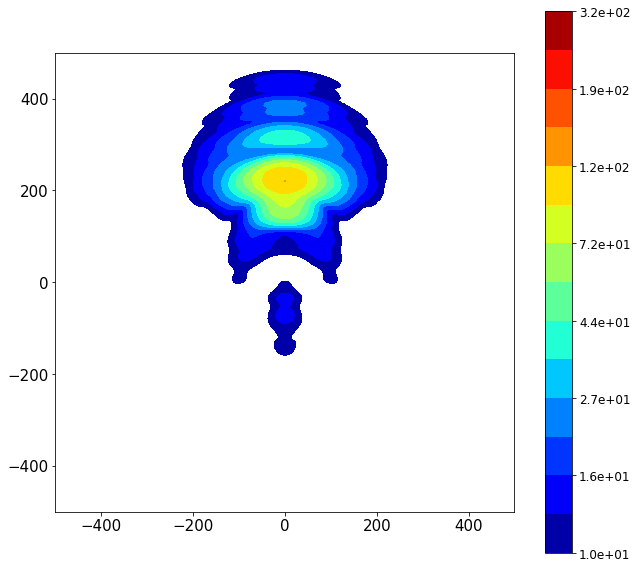

In [115]:
fig, ax = plot2D_key(data_w400, keys=['x', 'y', 'val0'], logz=True, levels=np.power(10., np.linspace(10, 25, 15)/10))
xlim = [-500, 500]
ylim = [-500, 500]
zlim = [0.1, None]
ax.set_xlim(xlim)
ax.set_ylim(ylim)

In [116]:
data_w400_slice = getSlice(data_w400, slicekey='x', slice_val=0.)
func.print_list(data_w400['x'])
func.print_list(data_w400_slice['x'])
func.print_list(data_w400_slice['y'])
func.print_list(data_w400_slice['val0'])

getSlice min_diff = 0.01
x (size=(429025,)) = [-1635.7 -1635.7 -1635.7 ...  1635.7  1635.7  1635.7]
 (size=(655,)) = [0. 0. 0. ... 0. 0. 0.]
 (size=(655,)) = [-1635.7 -1630.7 -1625.7 ...  1625.7  1630.7  1635.7]
 (size=(655,)) = [0. 0. 0. ... 0. 0. 0.]


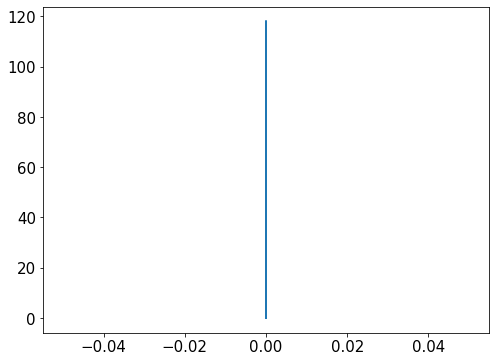

In [117]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.plot( data_w400_slice['x'], data_w400_slice['val0'] )

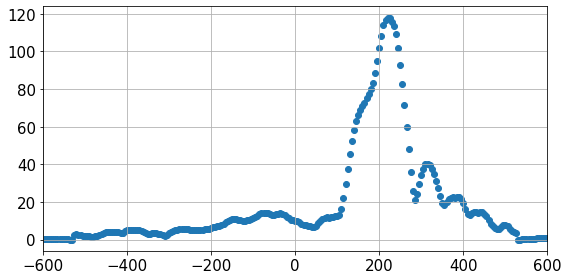

In [118]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.scatter( data_w400_slice['y'], data_w400_slice['val0'] )
ax.set_xlim([-D_mirror/mm/2., D_mirror/mm/2.])
ax.grid(True)
fig.tight_layout()

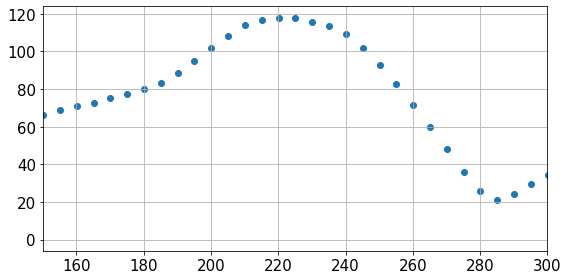

In [119]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
ax.scatter( data_w400_slice['y'], data_w400_slice['val0'] )
ax.set_xlim([150, 300])
ax.grid(True)
fig.tight_layout()

Beam size @ power = 1/e = 51.11 mm


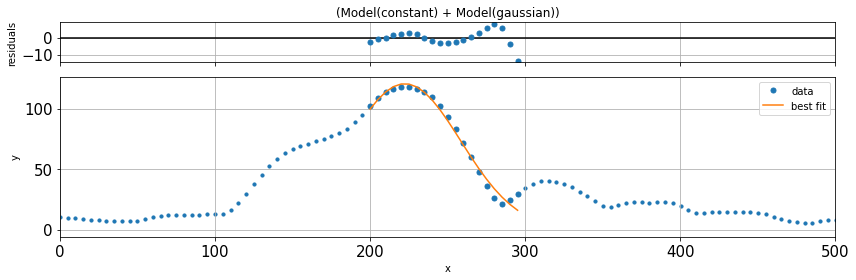

In [120]:
_x = data_w400_slice['y']
_y = data_w400_slice['val0']
_result = gauss_fit(_x, _y, x_fit_range=[200, 300], xlim=[0, 500])
#gauss_fit(_x, _y, x_fit_range=[200, 300])

_w = sigma2beamsize( _result.result.params['sigma'].value )
print(f'Beam size @ power = 1/e = {_w:.2f} mm')

Beam size @ power = 1/e = 73.60 mm


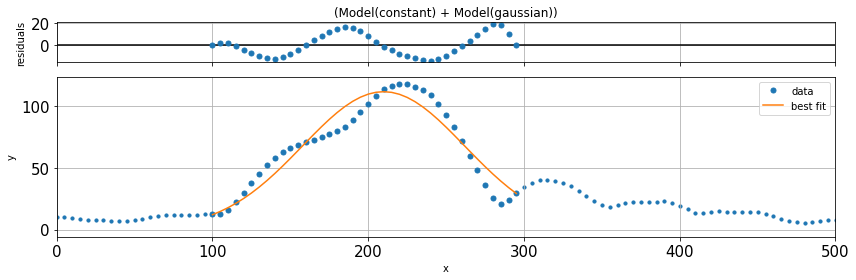

In [121]:
_x = data_w400_slice['y']
_y = data_w400_slice['val0']
_result = gauss_fit(_x, _y, x_fit_range=[100, 300], xlim=[0, 500])
#gauss_fit(_x, _y, x_fit_range=[200, 300])

_w = sigma2beamsize( _result.result.params['sigma'].value )
print(f'Beam size @ power = 1/e = {_w:.2f} mm')

x_list (size=(328,)) = [-1633.2 -1623.2 -1613.2 ...  1613.2  1623.2  1633.2]
y_list (size=(328,)) = [-1633.2 -1623.2 -1613.2 ...  1613.2  1623.2  1633.2]


/tmp/ipykernel_3387964/4191764218.py:56: UserWarning: Log scale: values of z <= 0 have been masked
  cs = ax.contourf(x_grid, y_grid, z_grid, levels=levels, cmap='jet', locator=locator)


(-100.0, 100.0)

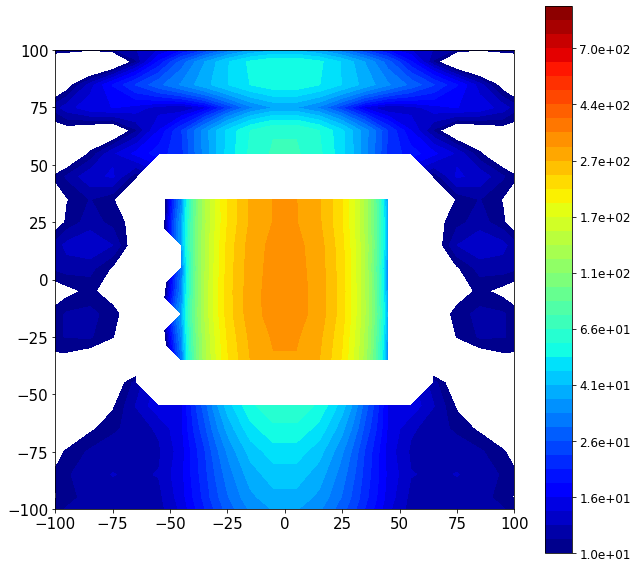

In [122]:
infile = 'e-field_abs_ave_waist.dat'
input_path = f'{indir}/{infile}'
data4 = read_CST(input_path, '3D_twovalue' )

fig, ax = plot2D_key(data4, keys=['x', 'y', 'val0'], logz=True, levels=np.power(10., np.linspace(10, 30, 40)/10))
xlim = [-100, 100]
ylim = [-100, 100]
ax.set_xlim(xlim)
ax.set_ylim(ylim)

x_list (size=(328,)) = [-1633.2 -1623.2 -1613.2 ...  1613.2  1623.2  1633.2]
y_list (size=(328,)) = [-1633.2 -1623.2 -1613.2 ...  1613.2  1623.2  1633.2]


/tmp/ipykernel_3387964/4191764218.py:56: UserWarning: Log scale: values of z <= 0 have been masked
  cs = ax.contourf(x_grid, y_grid, z_grid, levels=levels, cmap='jet', locator=locator)


(-100.0, 100.0)

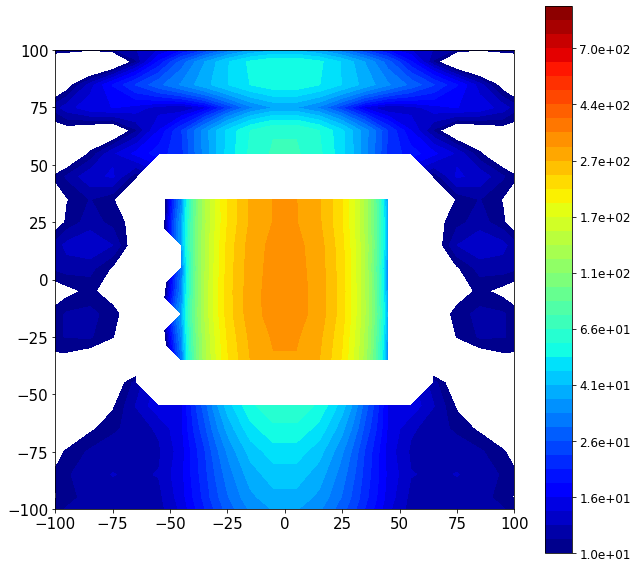

In [123]:
infile = 'e-field_abs_ave_aperture.dat'
input_path = f'{indir}/{infile}'
data5 = read_CST(input_path, '3D_twovalue' )

fig, ax = plot2D_key(data5, keys=['x', 'y', 'val0'], logz=True, levels=np.power(10., np.linspace(10, 30, 40)/10))
xlim = [-100, 100]
ylim = [-100, 100]
ax.set_xlim(xlim)
ax.set_ylim(ylim)

x_list (size=(328,)) = [-1633.2 -1623.2 -1613.2 ...  1613.2  1623.2  1633.2]
y_list (size=(328,)) = [-1633.2 -1623.2 -1613.2 ...  1613.2  1623.2  1633.2]


/tmp/ipykernel_3387964/4191764218.py:56: UserWarning: Log scale: values of z <= 0 have been masked
  cs = ax.contourf(x_grid, y_grid, z_grid, levels=levels, cmap='jet', locator=locator)


(-100.0, 100.0)

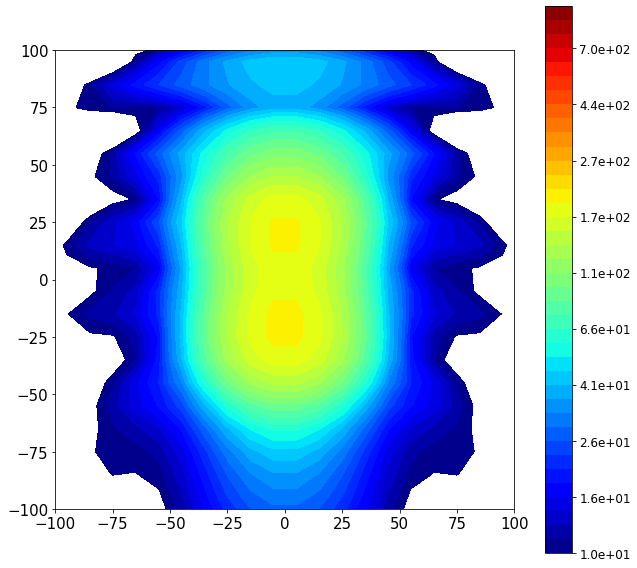

In [124]:
infile = 'e-field_abs_ave_aperture+10.dat'
input_path = f'{indir}/{infile}'
data5 = read_CST(input_path, '3D_twovalue' )

fig, ax = plot2D_key(data5, keys=['x', 'y', 'val0'], logz=True, levels=np.power(10., np.linspace(10, 30, 40)/10))
xlim = [-100, 100]
ylim = [-100, 100]
ax.set_xlim(xlim)
ax.set_ylim(ylim)

In [125]:
infile_list = [
    'e-field_abs_ave_w200.dat',
    'e-field_abs_ave_w400.dat',
    'e-field_abs_ave_w600.dat',
    'e-field_abs_ave_w700.dat',
]
w_list=np.array([200, 400, 600, 700])
label_list = [ f'z={_w} mm' for _w in w_list ]

def slice_file(infile, indir=indir, slicekey='x', slice_val=0.):
    _infile_path = f'{indir}/{infile}'
    _data = read_CST(_infile_path, '3D_twovalue' )
    _data_slice = getSlice(_data, slicekey=slicekey, slice_val=slice_val)
    
    return _data_slice

slicedata_list = []
for _infile in infile_list:
    slicedata_list.append( slice_file(_infile, indir, 'x', 0.))
    pass

getSlice min_diff = 0.01
getSlice min_diff = 0.01
getSlice min_diff = 0.01
getSlice min_diff = 0.01


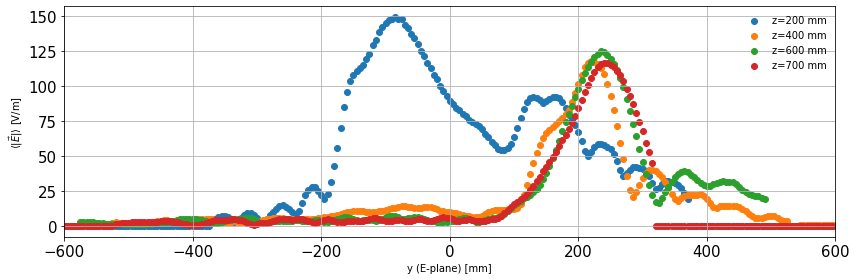

In [126]:
fig, ax = plt.subplots(1, 1, figsize=(12,4))
for _label, _data in zip(label_list, slicedata_list):
    ax.scatter( _data['y'], _data['val0'], label=_label )
    pass
ax.set_xlim([-D_mirror/mm/2., D_mirror/mm/2.])
ax.legend(frameon=False)
ax.grid(True)
ax.set_xlabel('y (E-plane) [mm]')
ax.set_ylabel(r'$\langle |\vec{E}| \rangle$ [V/m]')
fig.tight_layout()

Beam size @ power = 1/e = 28.28 mm
Beam size @ power = 1/e = 73.60 mm
Beam size @ power = 1/e = 77.60 mm
Beam size @ power = 1/e = 92.73 mm


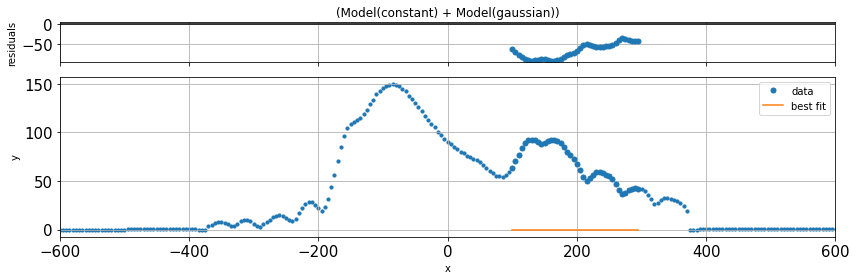

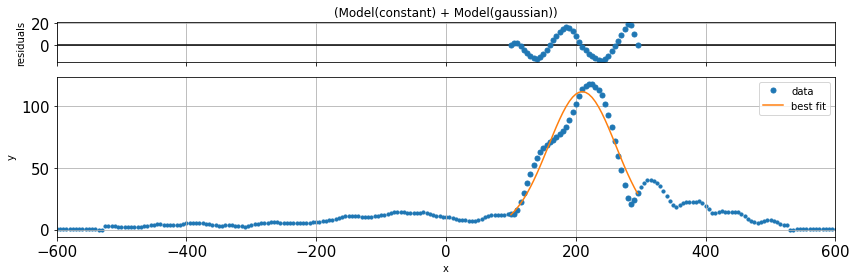

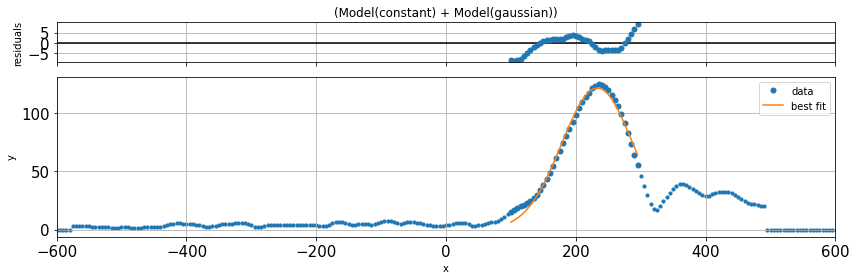

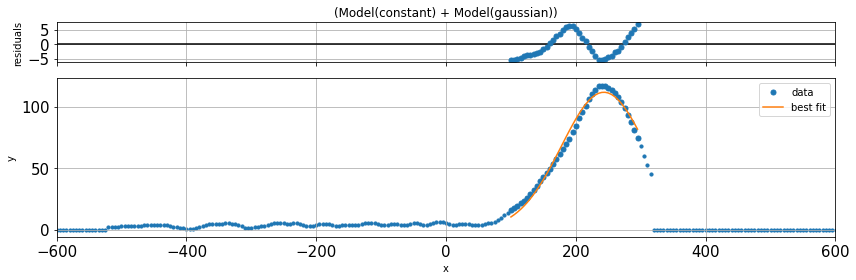

In [127]:
fitresult_list = []
beamsize_list = []
for _label, _data in zip(label_list, slicedata_list):
    _x = _data['y']
    _y = _data['val0']
    _result = gauss_fit(_x, _y, x_fit_range=[100, 300], xlim=[-D_mirror/mm/2, D_mirror/mm/2])
    fitresult_list.append( _result )
    beamsize_list.append( sigma2beamsize( _result.result.params['sigma'].value ) )
    
    print(f'Beam size @ power = 1/e = {beamsize_list[-1]:.2f} mm')
    pass

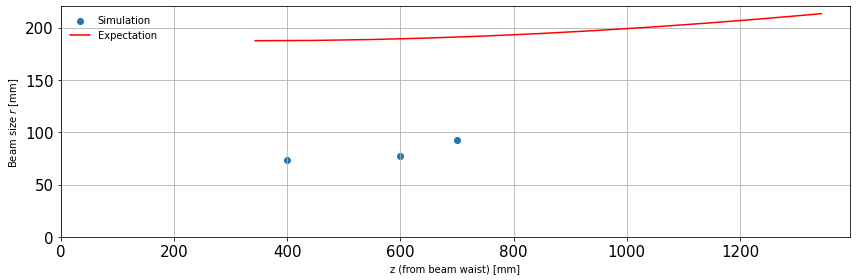

In [133]:
# Expectation
w_list_exp = z_mirror_list + z_mirror
beamsize_list_exp = beamsize_mirror_list

# Plot Simulation v.s. Expectation
fig, ax = plt.subplots(1, 1, figsize=(12,4))
ax.scatter(w_list[1:], beamsize_list[1:], label='Simulation')
ax.plot(w_list_exp/mm, beamsize_list_exp/mm, label='Expectation', c='red')
ax.legend(frameon=False)
ax.grid(True)
ax.set_xlabel('z (from beam waist) [mm]')
ax.set_ylabel('Beam size $r$ [mm]')
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
fig.tight_layout()

## v1-3 (Horn antenna ONLY)

getSlice min_diff = 5.01
getSlice min_diff = 5.01
getSlice min_diff = 5.01
getSlice min_diff = 5.01
getSlice min_diff = 5.01


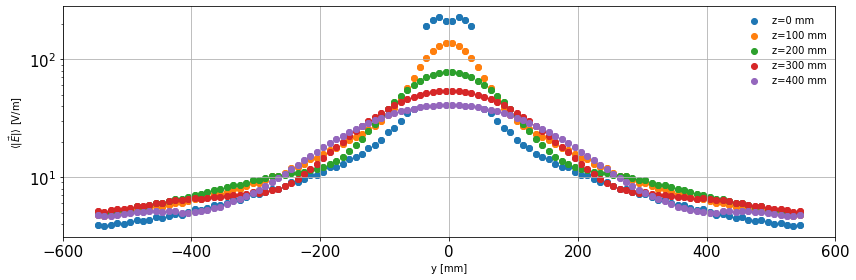

In [87]:
indir2 = 'input/CST/v1-3'
infile_list2 = [
    'e-field_AbsAve_w=0.dat',
    'e-field_AbsAve_w=100.dat',
    'e-field_AbsAve_w=200.dat',
    'e-field_AbsAve_w=300.dat',
    'e-field_AbsAve_w=400.dat',
]
w_list2 = np.array([0,100,200,300,400])
label_list2 = [ f'z={w} mm' for w in w_list2 ]

slicedata_list2 = []
for _infile in infile_list2:
    slicedata_list2.append( slice_file(_infile, indir2, 'x', 0.))
    pass

fig, ax = plt.subplots(1, 1, figsize=(12,4))
for _label, _data in zip(label_list2, slicedata_list2):
    ax.scatter( _data['y'], _data['val0'], label=_label )
    pass
ax.set_xlim([-D_mirror/mm/2., D_mirror/mm/2.])
ax.legend(frameon=False)
ax.grid(True)
ax.set_yscale('log')
ax.set_xlabel('y [mm]')
ax.set_ylabel(r'$\langle |\vec{E}| \rangle$ [V/m]')
fig.tight_layout()

Beam size @ power = 1/e = 43.80 mm
Beam size @ power = 1/e = 81.26 mm
Beam size @ power = 1/e = 115.47 mm
Beam size @ power = 1/e = 161.65 mm
Beam size @ power = 1/e = 212.41 mm


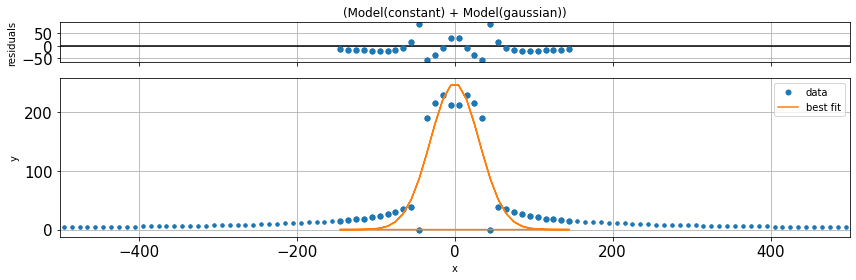

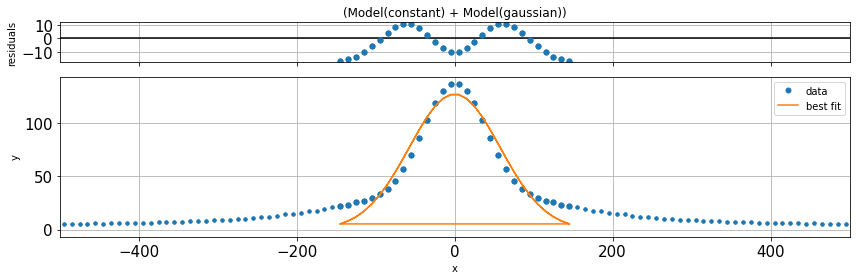

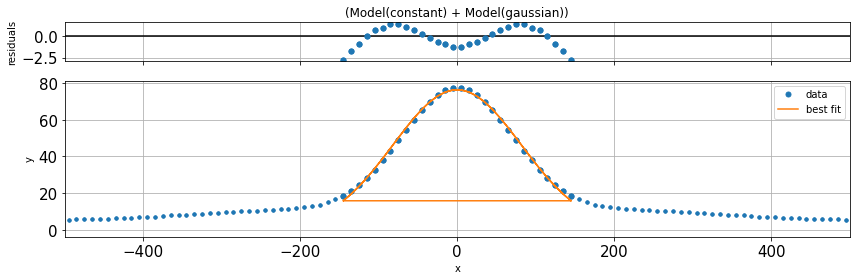

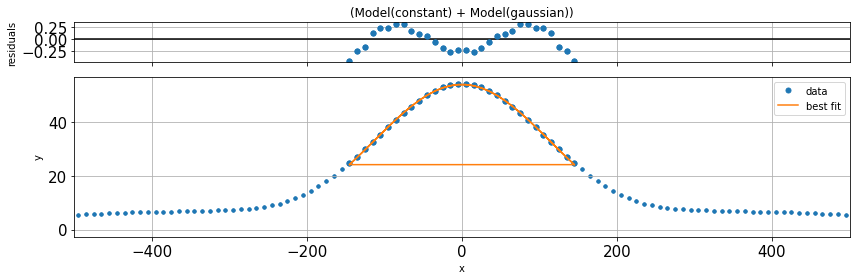

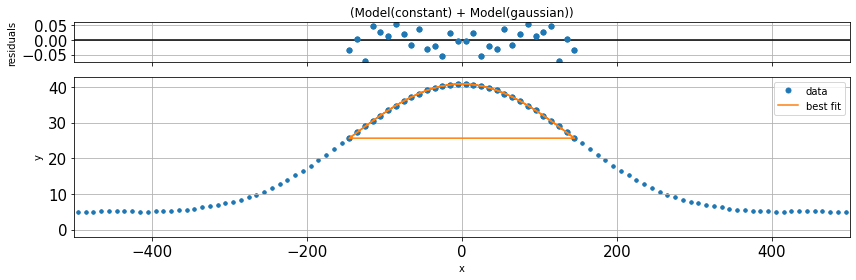

In [88]:
fitresult_list2 = []
beamsize_list2 = []
for _label, _data in zip(label_list2, slicedata_list2):
    _x = _data['y']
    _y = _data['val0']
    _result = gauss_fit(_x, _y, x_fit_range=[-150, 150], xlim=[-500, 500])
    fitresult_list2.append( _result )
    beamsize_list2.append( sigma2beamsize( _result.result.params['sigma'].value ) )
    
    print(f'Beam size @ power = 1/e = {beamsize_list2[-1]:.2f} mm')
    pass

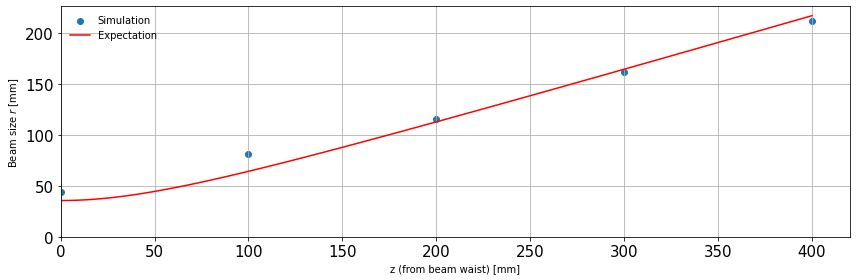

In [89]:
# Expectation
w_list2_exp = np.linspace(0, w_list2[-1], 100)
beamsize_list2_exp = calc_beamwaist(z=w_list2_exp*mm, w0=w0, wavelength=wavelength)

# Plot Simulation v.s. Expectation
fig, ax = plt.subplots(1, 1, figsize=(12,4))
ax.scatter(w_list2, beamsize_list2, label='Simulation')
ax.plot(w_list2_exp, beamsize_list2_exp/mm, label='Expectation', c='red')
ax.legend(frameon=False)
ax.grid(True)
ax.set_xlabel('z (from beam waist) [mm]')
ax.set_ylabel('Beam size $r$ [mm]')
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
fig.tight_layout()

## v1-3-2 (Horn antenna ONLY)

In [90]:
indir3 = 'input/CST/v1-3-2'
infile_list3 = [
    'e-field_AbsAve_w=0.dat',
    'e-field_AbsAve_w=100.dat',
    'e-field_AbsAve_w=200.dat',
    'e-field_AbsAve_w=300.dat',
    'e-field_AbsAve_w=400.dat',
]
w_list3 = np.array([0,100,200,300,400])
label_list3 = [ f'w={w} mm' for w in w_list3 ]

### E-plane slice (x=0)

getSlice min_diff = 5.01
getSlice min_diff = 5.01
getSlice min_diff = 5.01
getSlice min_diff = 5.01
getSlice min_diff = 5.01


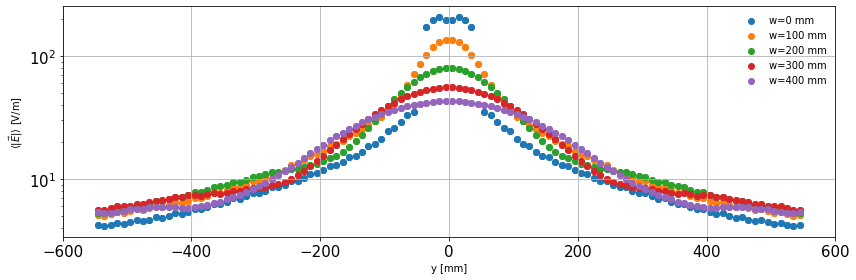

In [91]:
# Slice @ x=0 --> E-plane slice
slicedata_list3 = []
for _infile in infile_list3:
    slicedata_list3.append( slice_file(_infile, indir3, 'x', 0.))
    pass

fig, ax = plt.subplots(1, 1, figsize=(12,4))
for _label, _data in zip(label_list3, slicedata_list3):
    ax.scatter( _data['y'], _data['val0'], label=_label )
    pass
ax.set_xlim([-D_mirror/mm/2., D_mirror/mm/2.])
ax.legend(frameon=False)
ax.grid(True)
ax.set_xlabel('y [mm]')
ax.set_ylabel(r'$\langle |\vec{E}| \rangle$ [V/m]')
ax.set_yscale('log')
fig.tight_layout()

Beam size @ power = 1/e = 43.75 mm
Beam size @ power = 1/e = 85.34 mm
Beam size @ power = 1/e = 117.45 mm
Beam size @ power = 1/e = 162.99 mm
Beam size @ power = 1/e = 213.12 mm


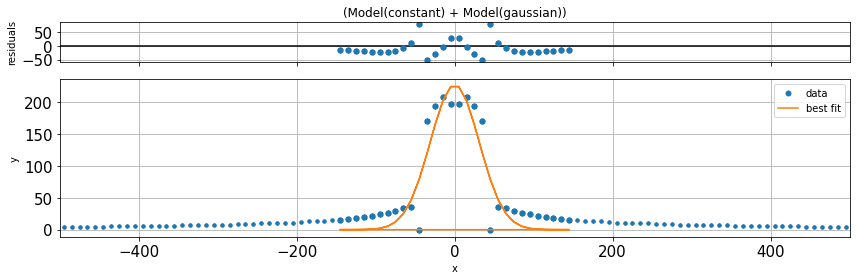

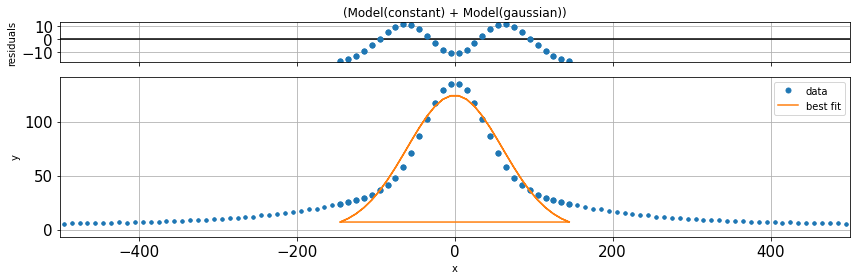

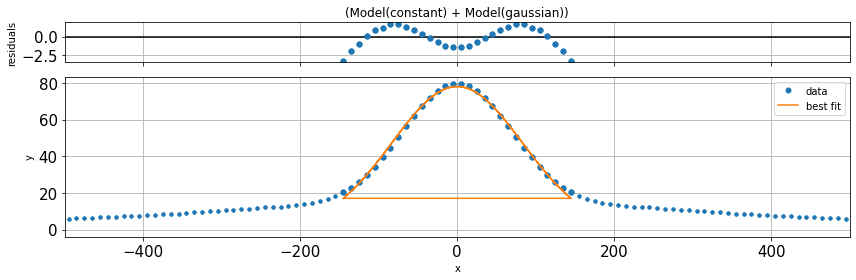

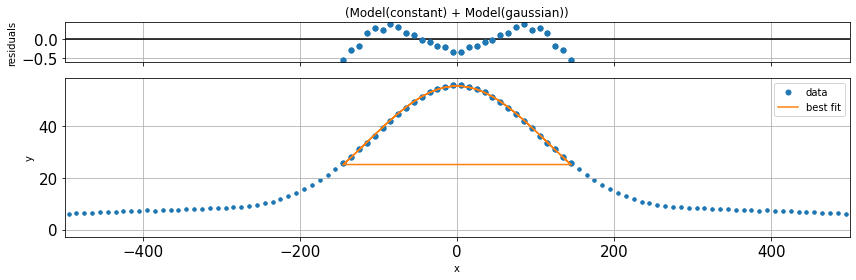

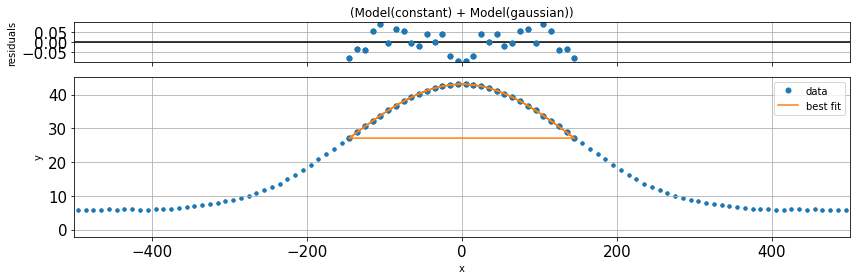

In [92]:
fitresult_list3 = []
beamsize_list3 = []
for _label, _data in zip(label_list3, slicedata_list3):
    _x = _data['y']
    _y = _data['val0']
    _result = gauss_fit(_x, _y, x_fit_range=[-150, 150], xlim=[-500, 500])
    fitresult_list3.append( _result )
    beamsize_list3.append( sigma2beamsize( _result.result.params['sigma'].value ) )
    
    print(f'Beam size @ power = 1/e = {beamsize_list3[-1]:.2f} mm')
    pass

w0 = 35.618942383895806 mm
w0_2 = 35.618942383895806 mm


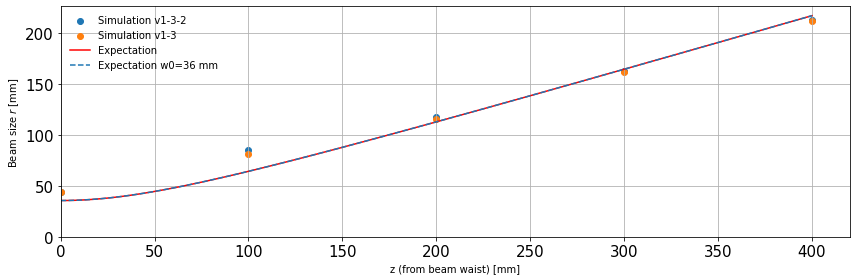

In [93]:
# Expectation
_w0 = antenna_pars_v1_3_2['w0A']
print(f'w0 = {_w0/mm} mm')
w_list3_exp = np.linspace(0, w_list3[-1], 100)
beamsize_list3_exp = calc_beamwaist(z=w_list3_exp*mm, w0=_w0, wavelength=wavelength)

# Expectation2 
# Antenna parameters
_pars = calc_antenna_parameters(antenna_w_over_A=0.50, verbose=0)
_w02 = _pars['w0A']
print(f'w0_2 = {_w02/mm} mm')
beamsize_list3_exp2 = calc_beamwaist(z=w_list3_exp*mm, w0=_w02, wavelength=wavelength)

# Plot Simulation v.s. Expectation
fig, ax = plt.subplots(1, 1, figsize=(12,4))
ax.scatter(w_list3, beamsize_list3, label='Simulation v1-3-2')
ax.scatter(w_list2, beamsize_list2, label='Simulation v1-3')
ax.plot(w_list3_exp, beamsize_list3_exp/mm, label='Expectation', c='red')
ax.plot(w_list3_exp, beamsize_list3_exp2/mm, label=f'Expectation w0={_w02/mm:.0f} mm', ls='--')
ax.legend(frameon=False)
ax.grid(True)
ax.set_xlabel('z (from beam waist) [mm]')
ax.set_ylabel('Beam size $r$ [mm]')
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
fig.tight_layout()

### H-plane slice (y=0)

getSlice min_diff = 5.01
getSlice min_diff = 5.01
getSlice min_diff = 5.01
getSlice min_diff = 5.01
getSlice min_diff = 5.01


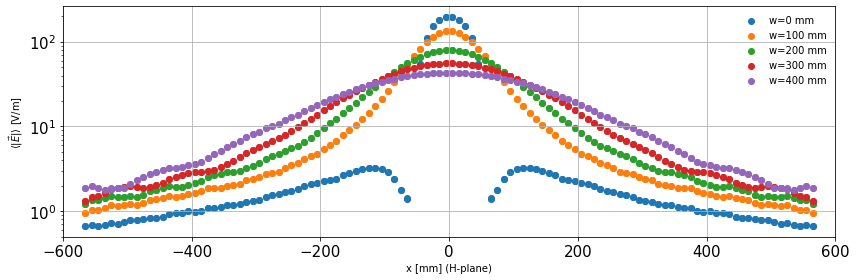

In [94]:
# Slice @ y=0 --> E-plane slice
slicedata_list3x = []
for _infile in infile_list3:
    slicedata_list3x.append( slice_file(_infile, indir3, 'y', 0.))
    pass

fig, ax = plt.subplots(1, 1, figsize=(12,4))
for _label, _data in zip(label_list3, slicedata_list3x):
    ax.scatter( _data['x'], _data['val0'], label=_label )
    pass
ax.set_xlim([-D_mirror/mm/2., D_mirror/mm/2.])
ax.legend(frameon=False)
ax.grid(True)
ax.set_xlabel('x [mm] (H-plane)')
ax.set_ylabel(r'$\langle |\vec{E}| \rangle$ [V/m]')
ax.set_yscale('log')
fig.tight_layout()

Beam size @ power = 1/e = 38.61 mm
Beam size @ power = 1/e = 72.88 mm
Beam size @ power = 1/e = 116.50 mm
Beam size @ power = 1/e = 164.15 mm
Beam size @ power = 1/e = 215.07 mm


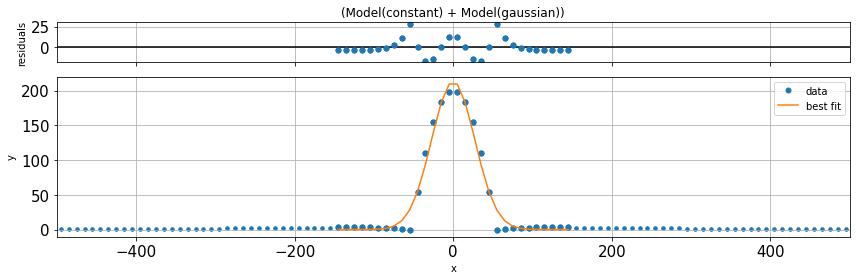

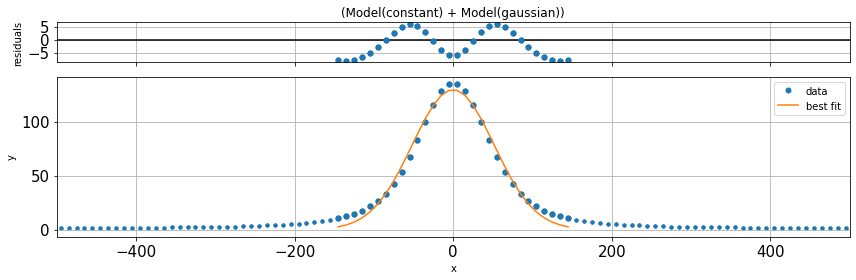

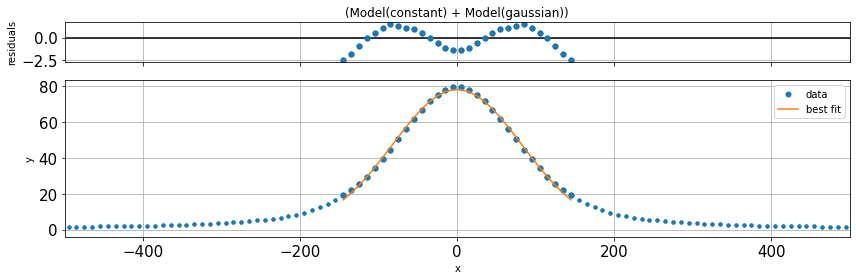

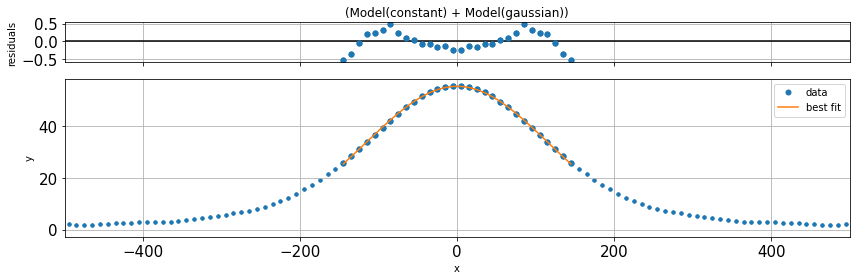

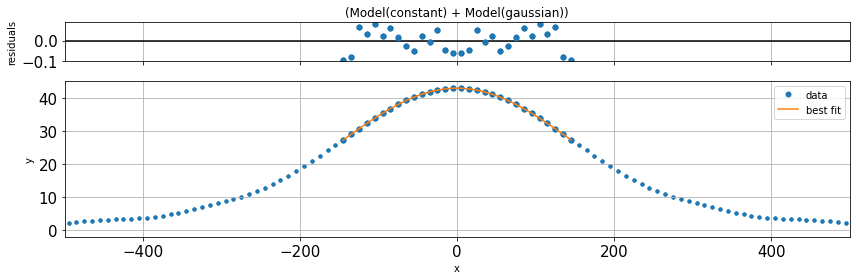

In [95]:
fitresult_list3x = []
beamsize_list3x = []
for _label, _data in zip(label_list3, slicedata_list3x):
    _x = _data['x']
    _y = _data['val0']
    _result = gauss_fit(_x, _y, x_fit_range=[-150, 150], xlim=[-500, 500])
    fitresult_list3x.append( _result )
    beamsize_list3x.append( sigma2beamsize( _result.result.params['sigma'].value ) )
    
    print(f'Beam size @ power = 1/e = {beamsize_list3x[-1]:.2f} mm')
    pass

w0 = 33.37606597070126 mm


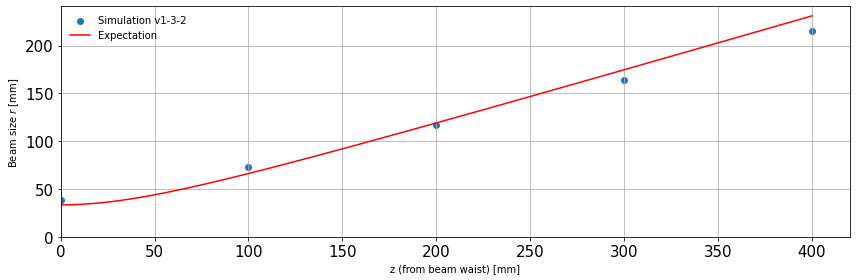

In [96]:
# Expectation
_w0 = antenna_pars_v1_3_2['w0B']
print(f'w0 = {_w0/mm} mm')
beamsize_list3x_exp = calc_beamwaist(z=w_list3_exp*mm, w0=_w0, wavelength=wavelength)

# Plot Simulation v.s. Expectation
fig, ax = plt.subplots(1, 1, figsize=(12,4))
ax.scatter(w_list3, beamsize_list3x, label='Simulation v1-3-2')
ax.plot(w_list3_exp, beamsize_list3x_exp/mm, label='Expectation', c='red')
ax.legend(frameon=False)
ax.grid(True)
ax.set_xlabel('z (from beam waist) [mm]')
ax.set_ylabel('Beam size $r$ [mm]')
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
fig.tight_layout()

# The End